# The code for saturation modeling approach and related figures

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import scipy.stats as stats
import glob as glob
import scipy.cluster.hierarchy as clust
import scipy.stats as stats
import os as os
rcParams['pdf.fonttype']=42
rcParams['font.size']=12

## Use Avana20Q2 data CrisprCleanR and BagelV2 processed


In [4]:
bf=pd.read_table('../Avana20Q2_data_with_CCLE_IDs.txt', sep="\t", index_col=0)
bf.head()
#659 screens above F-measure>0.8 after crispr cleanR


,CALU1_LUNG,HUCCT1_BILIARY_TRACT,KMRC20_KIDNEY,253J_URINARY_TRACT,RAJI_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HCC2429_LUNG,YD38_UPPER_AERODIGESTIVE_TRACT,MHHNB11_AUTONOMIC_GANGLIA,ESS1_ENDOMETRIUM,TFK1_BILIARY_TRACT,...,UACC257_SKIN,AU565_BREAST,HEC1_ENDOMETRIUM,MEC1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NCIH522_LUNG,DOTC24510_CERVIX,MERO82_PLEURA,MEL290_UVEA,ICC106_BILIARY_TRACT,PECAPJ41CLONED2_UPPER_AERODIGESTIVE_TRACT
A1BG,-22.015,-16.591,-21.307,-15.856,-16.258,-14.497,-15.352,-18.578,-10.537,-25.080,...,-3.556,-8.869,-19.276,-17.635,-2.854,-26.693,-9.323,-25.026,-26.251,-17.701
A1CF,-47.060,-18.895,-26.172,-12.448,-17.446,-8.172,-11.898,-24.322,-16.476,-34.396,...,-8.674,-13.703,-20.240,-22.125,-8.422,-25.009,-7.187,-20.434,-24.472,-11.012
A2M,-19.829,-11.047,-17.706,-8.766,-15.336,-8.104,-10.438,-7.648,-16.074,-23.963,...,-4.219,-2.800,-19.603,-18.759,-4.591,-26.254,-4.848,-26.913,-21.061,-8.956
A2ML1,-28.154,-23.691,-25.717,-15.747,-23.090,-9.030,-11.832,-16.182,-23.864,-30.493,...,-8.031,-16.233,-22.813,-9.454,-6.728,-35.078,-6.486,-21.051,-31.189,-16.949
A3GALT2,-32.328,-31.929,-26.826,-11.024,-21.150,-12.258,-15.324,-24.551,-18.677,-28.148,...,-9.354,-20.133,-17.622,-14.150,-9.620,-26.834,-3.331,-16.657,-28.814,-12.737


In [5]:
transposed_bf=bf.T
tissues = dict()
for cell_line in transposed_bf.index:
    if cell_line.split("_",1)[1] not in tissues:
        tissues[cell_line.split("_",1)[1]]=list()
    tissues[cell_line.split("_",1)[1]].append(cell_line)

In [6]:
for i in tissues.keys():
    if len(tissues[i])>=16:
        print(str(i) +":"+ str(len(tissues[i])))

LUNG:88
BILIARY_TRACT:24
KIDNEY:18
URINARY_TRACT:25
HAEMATOPOIETIC_AND_LYMPHOID_TISSUE:65
UPPER_AERODIGESTIVE_TRACT:25
ENDOMETRIUM:19
CENTRAL_NERVOUS_SYSTEM:54
PANCREAS:32
LIVER:22
OESOPHAGUS:24
SKIN:45
LARGE_INTESTINE:25
OVARY:37
STOMACH:24
SOFT_TISSUE:33
BONE:22
BREAST:29


## Select tissues with more than 18 cell lines

In [8]:
tissue_names=['BILIARY_TRACT', 'SOFT_TISSUE', 'URINARY_TRACT', 'PANCREAS', 'SKIN',
             'CENTRAL_NERVOUS_SYSTEM', 'BREAST', 'LUNG', 'HAEMATOPOIETIC_AND_LYMPHOID_TISSUE',
             'BONE', 'OVARY', 'OESOPHAGUS', 'LIVER','UPPER_AERODIGESTIVE_TRACT',
             'LARGE_INTESTINE', 'ENDOMETRIUM', 'STOMACH', 'KIDNEY']

             

In [9]:
for i in tissue_names:
    globals()[i]=bf[tissues[i]]

In [10]:
LUNG.head()

,CALU1_LUNG,HCC2429_LUNG,NCIH322_LUNG,NCIH1339_LUNG,NCIH1048_LUNG,EBC1_LUNG,KNS62_LUNG,NCIH446_LUNG,HOP62_LUNG,NCIH2172_LUNG,...,CORL311_LUNG,NCIH2170_LUNG,DMS53_LUNG,EPLC272H_LUNG,LUDLU1_LUNG,NCIH1581_LUNG,HCC515_LUNG,HCC95_LUNG,NCIH460_LUNG,NCIH522_LUNG
A1BG,-22.015,-14.497,-29.831,-25.712,-31.726,-5.812,-21.591,-9.903,-15.545,-29.035,...,-11.579,-27.158,-38.977,-31.387,-21.332,-12.713,-18.710,-15.292,-14.920,-2.854
A1CF,-47.060,-8.172,-33.821,-19.709,-26.811,-13.032,-19.362,-4.195,-11.623,-16.753,...,-11.440,-18.179,-43.459,-38.409,-17.503,-22.848,-28.502,-19.610,-21.844,-8.422
A2M,-19.829,-8.104,-13.634,-17.546,-30.157,-6.666,-17.091,-2.826,-18.110,-8.694,...,-2.255,-22.049,-35.669,-27.601,-20.537,-9.113,-18.658,-8.550,-11.615,-4.591
A2ML1,-28.154,-9.030,-35.527,-19.138,-28.240,-15.537,-13.106,-7.474,-16.548,-36.383,...,-10.115,-27.506,-43.261,-31.324,-25.105,-22.095,-21.149,-25.227,-21.607,-6.728
A3GALT2,-32.328,-12.258,-32.604,-17.878,-32.120,-8.950,-17.504,-7.388,-23.910,-22.304,...,-10.575,-31.764,-34.062,-54.472,-16.755,-27.043,-25.379,-24.788,-19.307,-9.620


In [11]:
from sklearn.utils import resample

In [12]:
def plot_essentials_num_of_screens_part1 (bootstrapped_samples, data):
    #figure( figsize(14,5))

    ess_per_screen={}
    
    bootstrapped_samples1=bootstrapped_samples.copy()   
    bootstrapped_samples1[bootstrapped_samples1>=10]=10
    bootstrapped_samples1[bootstrapped_samples1<10]=0
    bootstrapped_samples1[bootstrapped_samples1>0]=1
    essential_count = bootstrapped_samples1.sum(1)
    numhits_per_screen = bootstrapped_samples1.sum(0)

    ess_per_screen= pd.DataFrame( index=bootstrapped_samples1.columns.values)
    ess_per_screen['Number_of_Hits_At_BF10']=numhits_per_screen

    ess_per_screen.sort_values('Number_of_Hits_At_BF10', ascending=False,inplace=True)
    cumulative_essentials = {}

    numSamples, numCols = ess_per_screen.shape

    cumulative_essentials_count = zeros(numSamples)
    hits_per_screen=dict()
    for k in range(numSamples):
        s = ess_per_screen.index.values[k]
        hits = (data.loc[:,s][data.loc[:,s]>=10]).index
        hits_per_screen[s]=hits # get hits per screen
        for h in hits:
            cumulative_essentials[h] = 1
        cumulative_essentials_count[k] = len(cumulative_essentials.keys())
    #return plot( arange(1,9), cumulative_essentials_count, linestyle=':', marker='o', markersize=1, label='lung-bootstrapped') 
    #return hits_per_screen

    #get actual list of cumulative essentials
    cumulative_essentials_bootstrap=list(cumulative_essentials.keys())
    
    #get a dataframe for ess genes observations among cumul. ess form bootstrapped screens
    bootstr_df=pd.DataFrame(index=cumulative_essentials_bootstrap, columns=ess_per_screen.index.values)
    match_dict={}
    not_match_dict={}
    for l, m in zip(bootstr_df.index, bootstr_df.dtypes.index):
        match_dict[m]=[x for x in bootstr_df.index if x in hits_per_screen[m]]
        not_match_dict[m]=[x for x in bootstr_df.index if x not in hits_per_screen[m]]
        for genes in match_dict[m]:
            bootstr_df.loc[genes][m]=1
        for geness in not_match_dict[m]:
            bootstr_df.loc[geness][m]=0
    bootstr_df['Ess_count']=bootstr_df.sum(axis=1)
    #return bootstr_df # okay returns the df properly

     # define a new df with essential gene counts
    final_df=bootstr_df[['Ess_count']]
    one=list()
    two=list()
    three=list()
    four=list()
    five=list()
    six=list()
    seven=list()
    eight=list()

    for i in final_df.index:
        if final_df['Ess_count'][i]==1:
            one.append(i)
        if final_df['Ess_count'][i]==2:
            two.append(i)
        if final_df['Ess_count'][i]==3:
            three.append(i)
        if final_df['Ess_count'][i]==4:
            four.append(i)
        if final_df['Ess_count'][i]==5:
            five.append(i)
        if final_df['Ess_count'][i]==6:
            six.append(i)
        if final_df['Ess_count'][i]==7:
            seven.append(i)
        if final_df['Ess_count'][i]==8:
            eight.append(i)
    
    new_df=pd.DataFrame(index=[1,2,3,4,5,6,7,8] , columns=['Number of Screens Gene is Essential in'] )
    new_df.loc[1]['Number of Screens Gene is Essential in']=len(one)
    new_df.loc[2]['Number of Screens Gene is Essential in']=len(two)
    new_df.loc[3]['Number of Screens Gene is Essential in']=len(three)
    new_df.loc[4]['Number of Screens Gene is Essential in']=len(four)
    new_df.loc[5]['Number of Screens Gene is Essential in']=len(five)
    new_df.loc[6]['Number of Screens Gene is Essential in']=len(six)
    new_df.loc[7]['Number of Screens Gene is Essential in']=len(seven)
    new_df.loc[8]['Number of Screens Gene is Essential in']=len(eight)




    ess_dict=dict()
    for i in np.arange(1,9):
        ess_dict[1]=one
        ess_dict[2]=two
        ess_dict[3]=three
        ess_dict[4]=four
        ess_dict[5]=five
        ess_dict[6]=six
        ess_dict[7]=seven
        ess_dict[8]=eight
        


    return new_df, cumulative_essentials_bootstrap, cumulative_essentials_count, ess_dict, final_df
    
    
    

In [13]:
# so this works but we need iteration

In [14]:
from tqdm import tqdm

In [15]:
for i in tqdm(tissue_names):
    
    globals()['%s_samples' % i]=pd.Series(globals()['%s' % i].dtypes.index)
    globals()['%s_data' % i]=bf[tissues[i]].copy()
    globals()['bootst_sam_%s' % i]=dict()
    globals()['bootst_%s' % i]=dict()
    globals()['results1_%s' % i]=dict()
    globals()['results2_%s' % i]=dict()
    globals()['cumul_ess_count_%s' % i]=dict()
    globals()['essential_genes_1_%s' % i]=dict()
    globals()['essential_genes_2_%s' % i]=dict()  
    globals()['count_ess_8obs1_%s' % i]=dict()
    globals()['count_ess_8obs2_%s' % i]=dict()
    globals()['cell_lines_%s' % i]=dict()
    globals()['cumul_ess_resultx_%s' % i]=dict()

100%|██████████| 18/18 [00:00<00:00, 53.00it/s]


In [16]:
for i in tissue_names:   
    
    for j in range(100): # for 100 iterations 
        globals()['bootst_%s' % i][j]=dict()
        globals()['bootst_sam_%s' % i][j] = globals()['%s_samples' % i].sample(replace=False, n=16).values #sample 16
        
        globals()['bootst_%s' % i][j][0]=globals()['%s_data' % i][globals()['bootst_sam_%s' % i][j][0:8]]
        globals()['bootst_%s' % i][j][1]=globals()['%s_data' % i][globals()['bootst_sam_%s' % i][j][8:16]]
        globals()['cell_lines_%s' % i][j]={0:globals()['bootst_sam_%s' % i][j][0:8], 1:globals()['bootst_sam_%s' % i][j][8:16] }


    



## Save the cell lines

In [18]:
import copy
for i in tissue_names:
    globals()['cell_lines_temp_%s' % i]= copy.deepcopy(globals()['cell_lines_%s' % i])


In [19]:
for i in tissue_names:
    for j in globals()['cell_lines_temp_%s' % i]:
        for k in globals()['cell_lines_temp_%s' % i][j]:
            globals()['cell_lines_temp_%s' % i][j][k] = ",".join(globals()['cell_lines_temp_%s' % i][j][k])

In [20]:
path = "./cell_lines_chosen/"

try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)


for i in tissue_names:
    pd.DataFrame.from_dict(globals()['cell_lines_temp_%s' % i], orient='index').to_csv("./cell_lines_chosen/"+
        str(i) + '_cell_lines_Avana20Q2_not_multi_in_100_iterations.csv')

Successfully created the directory ./cell_lines_chosen/ 


## cell lines saved for all tissues

## Model TPs from step 1

In [21]:
for i in tissue_names:
    globals()['output_from_part1_%s' % i]=dict()
    for j in range(100):
        globals()['output_from_part1_%s' % i][j]=(plot_essentials_num_of_screens_part1 (globals()['bootst_%s' % i][j][0],globals()['%s_data' % i]))
    
   
        

## save the outputs

In [23]:
for i in tissue_names:
    
    for j in range(100):
    
    
        globals()['cumul_ess_count_%s' % i][j]= globals()['output_from_part1_%s' % i][j][2]
        globals()['essential_genes_1_%s' % i][j]=globals()['output_from_part1_%s' % i][j][3]
        
        globals()['count_ess_8obs1_%s' % i][j]=globals()['output_from_part1_%s' % i][j][4]
       

        globals()['results1_%s' % i][j]=globals()['output_from_part1_%s' % i][j][0]
        globals()['cumul_ess_resultx_%s' % i]=globals()['output_from_part1_%s' % i][j][1]

    

## save essential genes

In [24]:
path = "./essential_genes_TP/"

os.mkdir(path)



#save essential gene lists 
for i in tissue_names:
    globals()['essential_genes_1_temp_%s' % i]= copy.deepcopy(globals()['essential_genes_1_%s' % i])
    
    for j in globals()['essential_genes_1_temp_%s' % i]:
        for k in globals()['essential_genes_1_temp_%s' % i][j]:
            globals()['essential_genes_1_temp_%s' % i][j][k] = ",".join(globals()['essential_genes_1_temp_%s' % i][j][k])
    
for i in tissue_names:
    pd.DataFrame.from_dict(globals()['essential_genes_1_temp_%s' % i], orient='index').to_csv("./essential_genes_TP/"+
        str(i) + '_essentials_Avana20Q2_not_multi_in_100_iterations_first8_TP.csv')    


## Save cumulative essential gene counts from 1st 8 screens chosen

In [25]:

path = "./cumulative_ess_counts_part1/"

os.mkdir(path)

for i in tissue_names:
    pd.DataFrame(globals()['cumul_ess_count_%s' %i]).to_csv("./cumulative_ess_counts_part1/"+
        str(i) + 'cumulative_essentials_counts_Avana20Q2_not_multi_in_100_iterations_from_first8.txt', sep="\t")    


In [26]:
cumul_ess_count_BONE[0]

array([1471., 1755., 1933., 2072., 2164., 2237., 2298., 2408.])

## Save gene level essentiality counts out of 8 obs in 100 iterations for TP

In [28]:
for i in tissue_names:
    globals()['geness_%s' %i]=list()
    for j in globals()['count_ess_8obs1_%s' % i]:
        globals()['genelist_screen_%s' %i]=globals()['count_ess_8obs1_%s' % i][j].index
        for k in globals()['genelist_screen_%s' %i]:
            if k not in globals()['geness_%s' %i]:
                globals()['geness_%s' %i].append(k)
    
    globals()['count_ess_8obs1_df_%s' % i]=pd.DataFrame(index=globals()['geness_%s' %i], columns=globals()['count_ess_8obs1_%s' % i].keys())
    for t in globals()['count_ess_8obs1_%s' % i]:
        for u in globals()['count_ess_8obs1_%s' % i][t].index:
            if u in globals()['count_ess_8obs1_df_%s' % i].index:
                globals()['count_ess_8obs1_df_%s' % i].loc[u][t]=globals()['count_ess_8obs1_%s' % i][t].loc[u]['Ess_count']
            else:
                globals()['count_ess_8obs1_df_%s' % i].loc[u][t]=0
    globals()['count_ess_8obs1_df_%s' % i]=globals()['count_ess_8obs1_df_%s' % i].fillna(0)
                

In [29]:
path = "./count_ess_8obs_TP/"

os.mkdir(path)


for i in tissue_names:
    pd.DataFrame(globals()['count_ess_8obs1_df_%s' % i]).to_csv("./count_ess_8obs_TP/"+
        str(i) + '_essentials_Avana20Q2_not_multi_counts_in_first_8_100_iterations_TP.txt', sep="\t")    


## Save results  that has the FP counts per bin

In [31]:
for i in tissue_names:
    globals()['first_%s' % i]= pd.DataFrame([(k,v) for k in globals()['results1_%s' % i].keys() for v in globals()['results1_%s' % i][k]['Number of Screens Gene is Essential in']], columns=['iteration', 'Num_ess'])


In [32]:

first_BONE.head()


,iteration,Num_ess
0,0,549
1,0,305
2,0,212
3,0,199
4,0,190


In [33]:
path = "./num_ess_per_bin_TP/"

os.mkdir(path)

for i in tissue_names:
    globals()['first_%s' % i]['rank']= ((1,2,3,4,5,6,7,8)*100)
    globals()['first_%s' % i].to_csv('./num_ess_per_bin_TP/' +
        str(i) + '_cell_lines_Avana20Q2_not_multi_num_ess_genes_vs_num_screens_TP_counts.txt', sep='\t', header=True)
    
    
    

## now need to save cumulative essential gene lists in first 8 screens


In [34]:
len(cumul_ess_resultx_BONE)

2321

In [35]:
path = "./cumulative_ess_gene_lists_TP/"

os.mkdir(path)

for i in tissue_names:
    with open('./cumulative_ess_gene_lists_TP/' + str(i) + '_cumulative_ess_genes_first_8_resultx.txt', 'w') as f:
        for s in globals()['cumul_ess_resultx_%s' % i]:
            f.write(str(s) + '\n')

## Now we need to model the FPs

In [36]:
def plot_essentials_num_of_screens_part2 (bootstrapped_samples, data, cumul_ess_step1):
    
    ess_per_screen={}
    
    bootstrapped_samples2=bootstrapped_samples.copy()    
    bootstrapped_samples2[bootstrapped_samples2>=10]=10
    bootstrapped_samples2[bootstrapped_samples2<10]=0
    bootstrapped_samples2[bootstrapped_samples2>0]=1
    essential_count = bootstrapped_samples2.sum(1)
    numhits_per_screen = bootstrapped_samples2.sum(0)

    ess_per_screen= pd.DataFrame( index=bootstrapped_samples2.columns.values)
    ess_per_screen['Number_of_Hits_At_BF10']=numhits_per_screen

    ess_per_screen.sort_values('Number_of_Hits_At_BF10', ascending=False,inplace=True)
    cumulative_essentials = {}

    numSamples, numCols = ess_per_screen.shape

    cumulative_essentials_count = zeros(numSamples)
    hits_per_screen=dict()
    for k in range(numSamples):
        s = ess_per_screen.index.values[k]
        hits = (data.loc[:,s][data.loc[:,s]>=10]).index
        hits_per_screen[s]=hits # get hits per screen
        for h in hits:
            cumulative_essentials[h] = 1
        cumulative_essentials_count[k] = len(cumulative_essentials.keys())
    #return plot( arange(1,9), cumulative_essentials_count, linestyle=':', marker='o', markersize=1, label='lung-bootstrapped') 
    #return hits_per_screen

    #get actual list of cumulative essentials
    cumulative_essentials_bootstrap2=list(cumulative_essentials.keys())
    
    # get unique hits compared to 1st bootstrapping
    unique_hits=[x for x in cumulative_essentials_bootstrap2 if x not in cumul_ess_step1] #output stored in result1
    
    #get a dataframe for ess genes observations among cumul. ess form bootstrapped screens
    bootstr_df2=pd.DataFrame(index=unique_hits, columns=ess_per_screen.index.values)
    match_dict={}
    not_match_dict={}
    for l, m in zip(bootstr_df2.index, bootstr_df2.dtypes.index):
        match_dict[m]=[x for x in bootstr_df2.index if x in hits_per_screen[m]]
        not_match_dict[m]=[x for x in bootstr_df2.index if x not in hits_per_screen[m]]
        for genes in match_dict[m]:
            bootstr_df2.loc[genes][m]=1
        for geness in not_match_dict[m]:
            bootstr_df2.loc[geness][m]=0
    bootstr_df2['Ess_count']=bootstr_df2.sum(axis=1)
    #return bootstr_df2 # okay returns the df properly

    # define a new df with essential gene counts
    final_df2=bootstr_df2[['Ess_count']]
    one2=list()
    two2=list()
    three2=list()
    four2=list()
    five2=list()
    six2=list()
    seven2=list()
    eight2=list()

    for i in final_df2.index:
        if final_df2['Ess_count'][i]==1:
            one2.append(i)
        if final_df2['Ess_count'][i]==2:
            two2.append(i)
        if final_df2['Ess_count'][i]==3:
            three2.append(i)
        if final_df2['Ess_count'][i]==4:
            four2.append(i)
        if final_df2['Ess_count'][i]==5:
            five2.append(i)
        if final_df2['Ess_count'][i]==6:
            six2.append(i)
        if final_df2['Ess_count'][i]==7:
            seven2.append(i)
        if final_df2['Ess_count'][i]==8:
            eight2.append(i)
    
    new_df2=pd.DataFrame(index=[1,2,3,4,5,6,7,8] , columns=['Number of Screens Gene is Essential in'] )
    new_df2.loc[1]['Number of Screens Gene is Essential in']=len(one2)
    new_df2.loc[2]['Number of Screens Gene is Essential in']=len(two2)
    new_df2.loc[3]['Number of Screens Gene is Essential in']=len(three2)
    new_df2.loc[4]['Number of Screens Gene is Essential in']=len(four2)
    new_df2.loc[5]['Number of Screens Gene is Essential in']=len(five2)
    new_df2.loc[6]['Number of Screens Gene is Essential in']=len(six2)
    new_df2.loc[7]['Number of Screens Gene is Essential in']=len(seven2)
    new_df2.loc[8]['Number of Screens Gene is Essential in']=len(eight2)


    ess_dict2=dict()
    for i in np.arange(1,9):
        ess_dict2[1]=one2
        ess_dict2[2]=two2
        ess_dict2[3]=three2
        ess_dict2[4]=four2
        ess_dict2[5]=five2
        ess_dict2[6]=six2
        ess_dict2[7]=seven2
        ess_dict2[8]=eight2

    return new_df2, ess_dict2, final_df2


In [37]:
for i in tissue_names:
    globals()['output_from_part2_%s' % i]=dict()
    for j in tqdm(range(100)):
        globals()['output_from_part2_%s' % i][j]=(plot_essentials_num_of_screens_part2 (globals()['bootst_%s' % i][j][1],globals()['%s_data' % i],globals()['cumul_ess_resultx_%s' % i] ))


100%|██████████| 100/100 [00:31<00:00,  3.22it/s]


### need to save outputs from part2

In [39]:
#part 1 return new_df, cumulative_essentials_bootstrap, cumulative_essentials_count, ess_dict, final_df
#part 2 return new_df2, ess_dict2, final_df2 

In [40]:
for i in tissue_names:
    
    for j in range(100):
        globals()['results2_%s' % i][j]=globals()['output_from_part2_%s' % i][j][0]
        globals()['essential_genes_2_%s' % i][j]=globals()['output_from_part2_%s' % i][j][1]
        globals()['count_ess_8obs2_%s' % i][j]=globals()['output_from_part2_%s' % i][j][2]
  

## let's save the "Essential genes" FPs

In [41]:
path = "./essential_genes_FP/"

os.mkdir(path)
#save essential gene lists:FP2
for i in tissue_names:
    globals()['essential_genes_2_temp_%s' % i]= copy.deepcopy(globals()['essential_genes_2_%s' % i])
    
    for j in globals()['essential_genes_2_temp_%s' % i]:
        for k in globals()['essential_genes_2_temp_%s' % i][j]:
            globals()['essential_genes_2_temp_%s' % i][j][k] = ",".join(globals()['essential_genes_2_temp_%s' % i][j][k])
    
for i in tissue_names:
    pd.DataFrame.from_dict(globals()['essential_genes_2_temp_%s' % i], orient='index').to_csv("./essential_genes_FP/"+
        str(i) + '_essentials_Avana20Q2_not_multi_in_100_iterations_second8_FP.csv')    


## Save gene level "essentiality" counts out of 8 obs in 100 iterations for FP

In [43]:
for i in tqdm(tissue_names):
    globals()['geness2_%s' %i]=list()
    for j in globals()['count_ess_8obs2_%s' % i]:
        globals()['genelist_screen_%s' %i]=globals()['count_ess_8obs2_%s' % i][j].index
        for k in globals()['genelist_screen_%s' %i]:
            if k not in globals()['geness2_%s' %i]:
                globals()['geness2_%s' %i].append(k)
    
    globals()['count_ess_8obs2_df_%s' % i]=pd.DataFrame(index=globals()['geness2_%s' %i], columns=globals()['count_ess_8obs2_%s' % i].keys())
    for t in globals()['count_ess_8obs2_%s' % i]:
        for u in globals()['count_ess_8obs2_%s' % i][t].index:
            if u in globals()['count_ess_8obs2_df_%s' % i].index:
                globals()['count_ess_8obs2_df_%s' % i].loc[u][t]=globals()['count_ess_8obs2_%s' % i][t].loc[u]['Ess_count']
            else:
                globals()['count_ess_8obs2_df_%s' % i].loc[u][t]=0
    globals()['count_ess_8obs2_df_%s' % i]=globals()['count_ess_8obs2_df_%s' % i].fillna(0)
                

100%|██████████| 18/18 [02:43<00:00,  9.08s/it]


In [44]:
count_ess_8obs2_df_BONE.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
ANKRD49,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,3.0,...,1.0,3.0,1.0,0.0,2.0,1.0,2.0,2.0,1.0,3.0
ASPM,1.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,...,0.0,2.0,0.0,1.0,2.0,0.0,1.0,2.0,1.0,2.0
ATIC,2.0,1.0,2.0,2.0,1.0,3.0,1.0,1.0,1.0,2.0,...,1.0,3.0,1.0,2.0,2.0,0.0,2.0,3.0,2.0,2.0
BCAP31,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,...,0.0,2.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,2.0
BCS1L,2.0,0.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,...,1.0,3.0,1.0,1.0,3.0,1.0,2.0,3.0,2.0,3.0


In [45]:
path = "./count_ess_8obs_FP/"

os.mkdir(path)


for i in tissue_names:
    pd.DataFrame(globals()['count_ess_8obs2_df_%s' % i]).to_csv("./count_ess_8obs_FP/"+
        str(i) + '_essentials_Avana20Q2_not_multi_counts_in_second_8_100_iterations_FP.txt', sep="\t")    


In [46]:
count_ess_8obs2_df_LIVER


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
ADAT3,3.0,0.0,2.0,1.0,2.0,1.0,1.0,2.0,0.0,0.0,...,2.0,2.0,1.0,3.0,2.0,1.0,2.0,1.0,2.0,2.0
ALDH18A1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
ANKS6,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,2.0,1.0,2.0,1.0,1.0,0.0,0.0,2.0
API5,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
ARID3A,2.0,1.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,...,0.0,2.0,1.0,1.0,2.0,0.0,1.0,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MYEOV,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
NME2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
SAMD4B,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
TMEM240,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Save results 2  that has the hit count per bin out of 8 for FPs 

In [47]:


for i in tissue_names:
    globals()['second_%s' % i]= pd.DataFrame([(k,v) for k in globals()['results2_%s' % i].keys() for v in globals()['results2_%s' % i][k]['Number of Screens Gene is Essential in']], columns=['iteration', 'Num_ess'])


In [48]:

second_BONE.head()


,iteration,Num_ess
0,0,202
1,0,39
2,0,6
3,0,0
4,0,0


In [52]:
path = "./num_ess_per_bin_FP/"

os.mkdir(path)

for i in tissue_names:
    globals()['second_%s' % i]['rank']= ((1,2,3,4,5,6,7,8)*100)
    globals()['second_%s' % i].to_csv('./num_ess_per_bin_FP/' +
        str(i) + '_cell_lines_Avana20Q2_not_multi_num_ess_genes_vs_num_screens_FP_counts.txt', sep='\t', header=True)
    
    
    

In [54]:
for i in tissue_names:
    globals()['mean_df1_%s' % i]=dict()
    globals()['std_df1_%s' % i]=dict()
    globals()['mean_df2_%s' % i]=dict()
    globals()['std_df2_%s' % i]=dict()
    
    for j in np.arange(1,9):
        globals()['mean_df1_%s' % i][j]=globals()['first_%s' % i][globals()['first_%s' % i]['rank']==j]['Num_ess'].mean()
        globals()['std_df1_%s' % i][j]=globals()['first_%s' % i][globals()['first_%s' % i]['rank']==j]['Num_ess'].std()
        globals()['mean_df2_%s' % i][j]=globals()['second_%s' % i][globals()['second_%s' % i]['rank']==j]['Num_ess'].mean()
        globals()['std_df2_%s' % i][j]=globals()['second_%s' % i][globals()['second_%s' % i]['rank']==j]['Num_ess'].std()
        
    

In [55]:
mean_df1_BONE

{1: 583.12,
 2: 302.05,
 3: 232.42,
 4: 209.69,
 5: 207.67,
 6: 223.52,
 7: 249.5,
 8: 298.63}

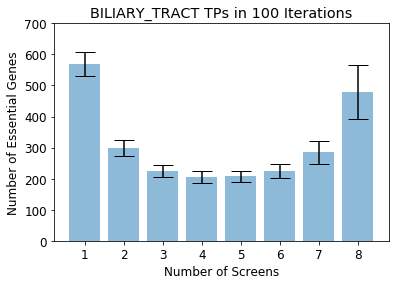

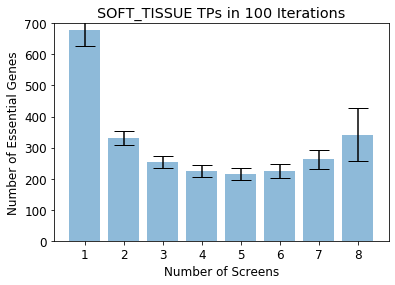

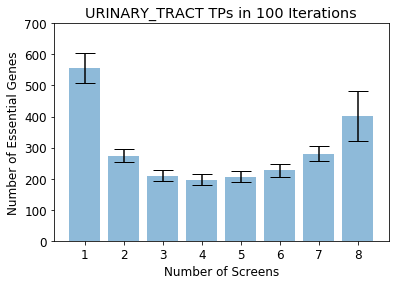

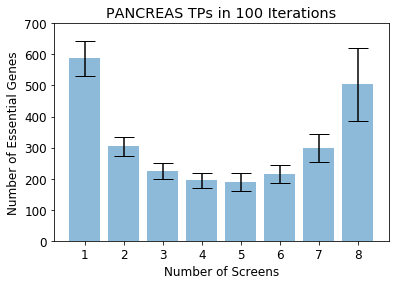

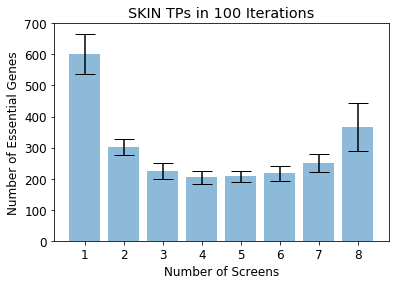

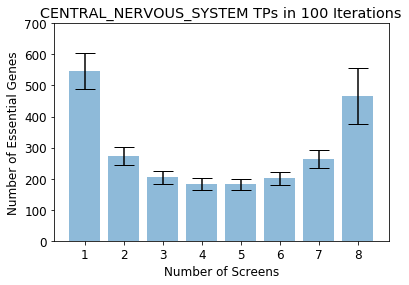

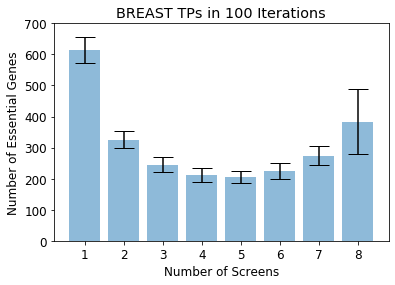

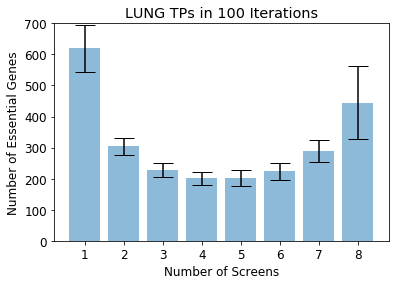

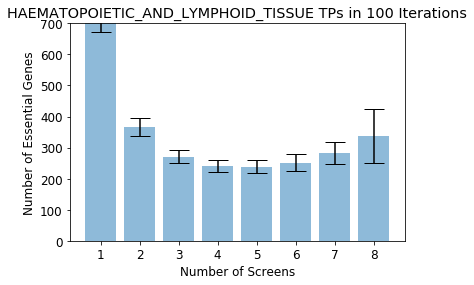

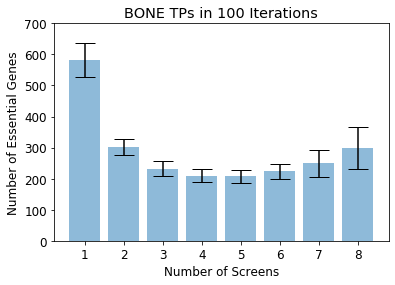

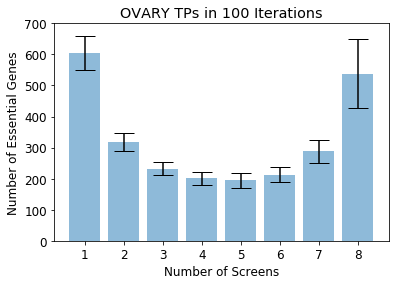

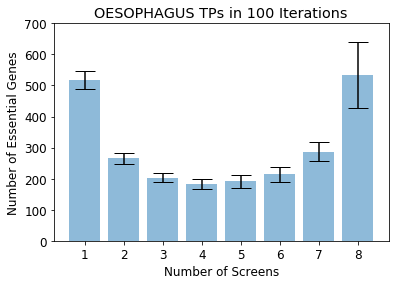

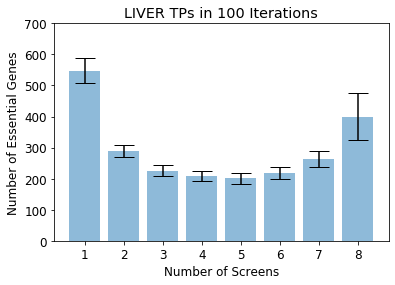

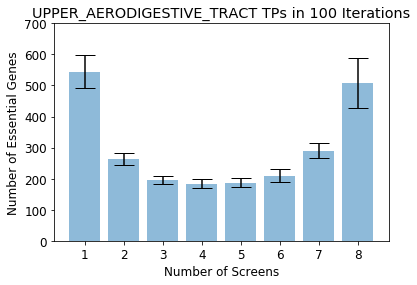

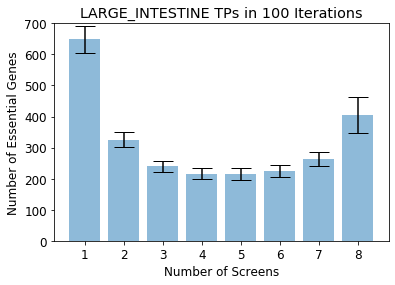

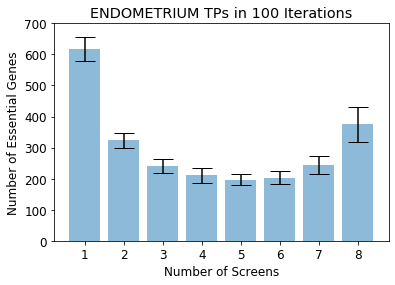

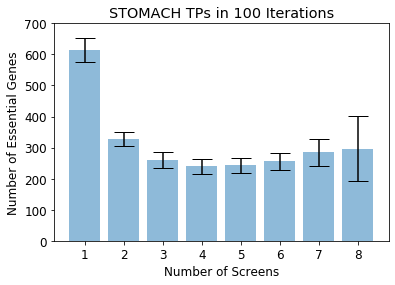

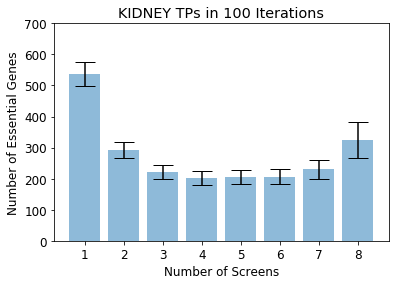

In [56]:
for i in tissue_names:
    


    plt.bar(np.arange(1,9),globals()['mean_df1_%s' % i].values(), yerr=globals()['std_df1_%s' % i].values(), align='center', alpha=0.5, ecolor='black', capsize=10)
    title(str(i)+' TPs in 100 Iterations' )
    xlabel('Number of Screens')
    ylabel('Number of Essential Genes')
    ylim(0,700)
    plt.show()

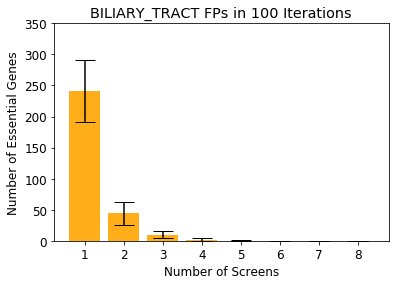

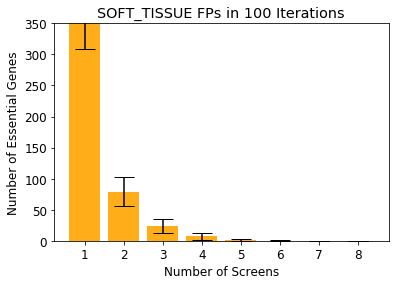

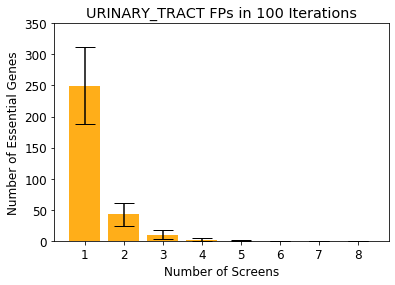

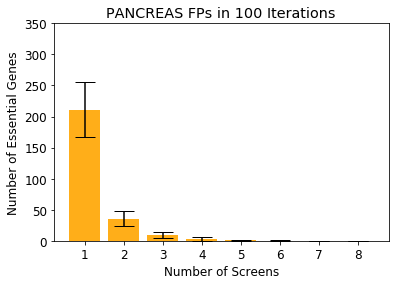

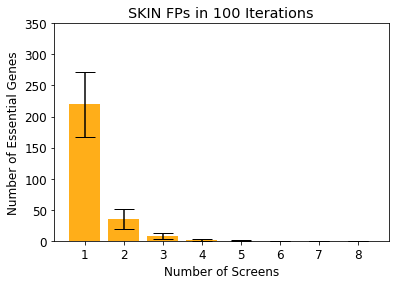

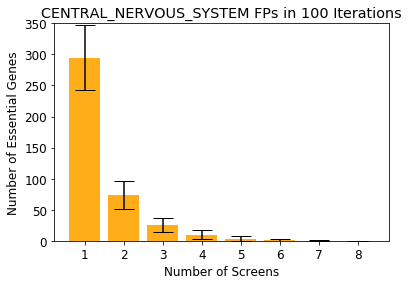

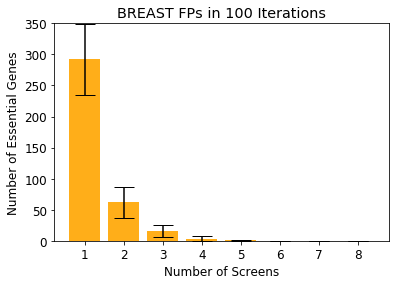

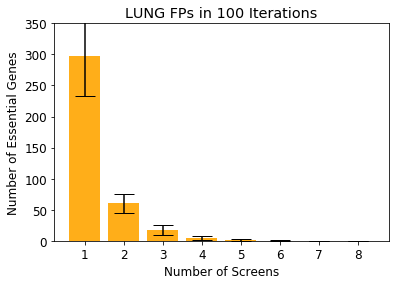

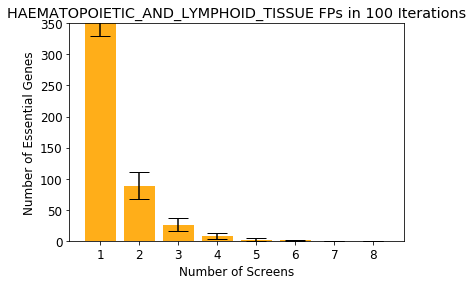

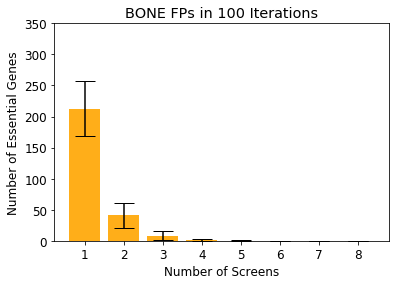

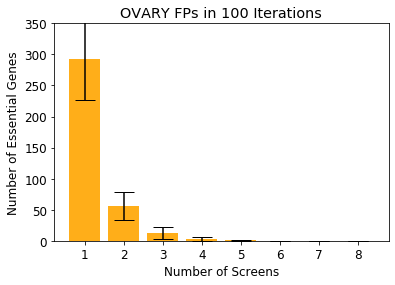

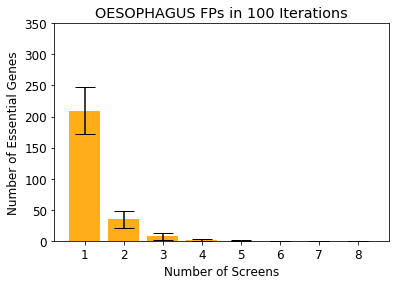

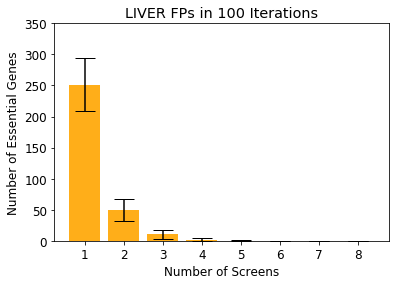

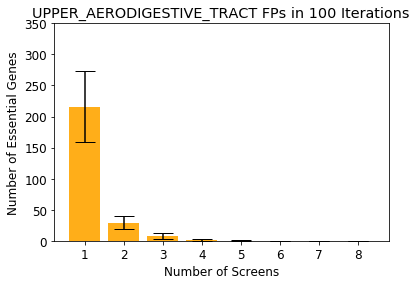

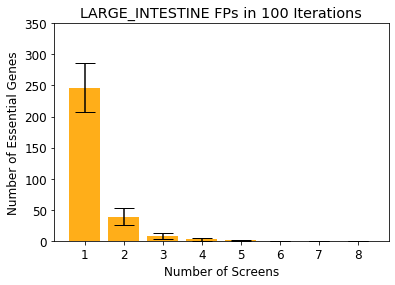

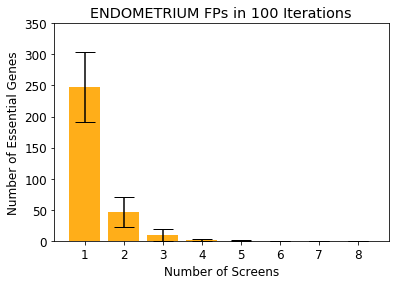

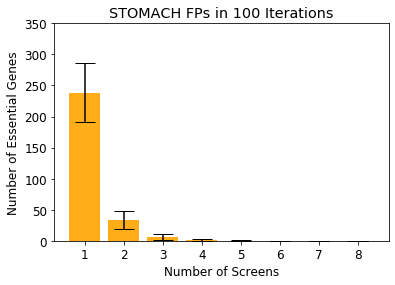

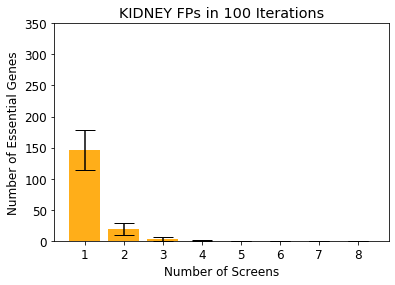

In [57]:
for i in tissue_names:
    plt.bar(np.arange(1,9),globals()['mean_df2_%s' % i].values(), yerr=globals()['std_df2_%s' % i].values(),color='orange', align='center', alpha=0.9, ecolor='black', capsize=10)
    title(str(i)+' FPs in 100 Iterations' )
    xlabel('Number of Screens')
    ylabel('Number of Essential Genes')
    ylim(0,350)
    plt.show()


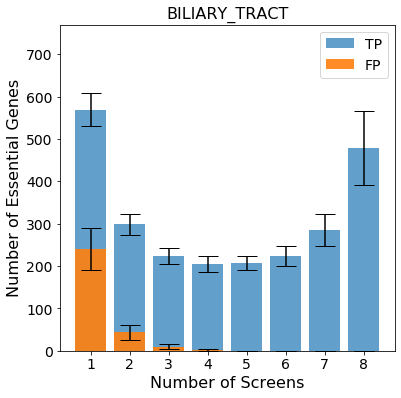

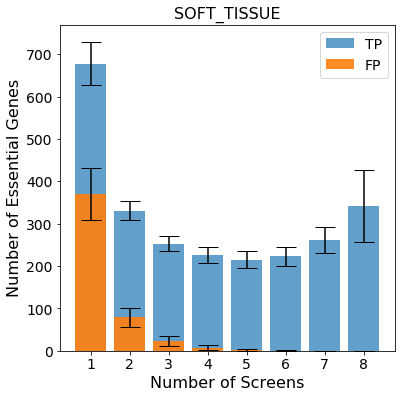

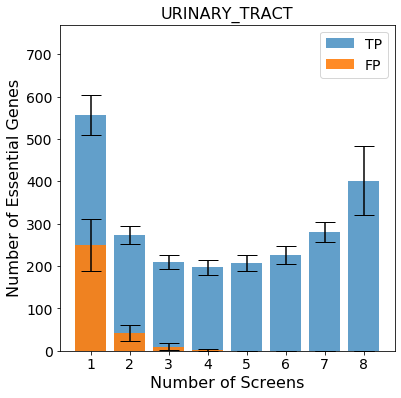

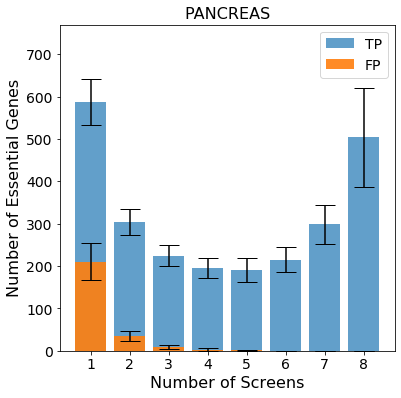

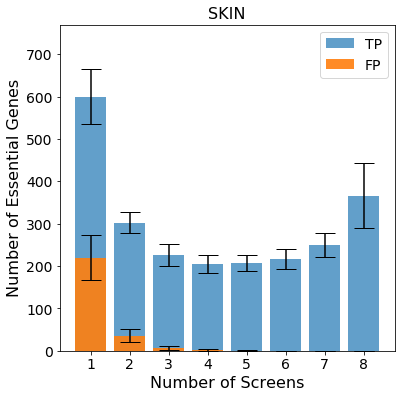

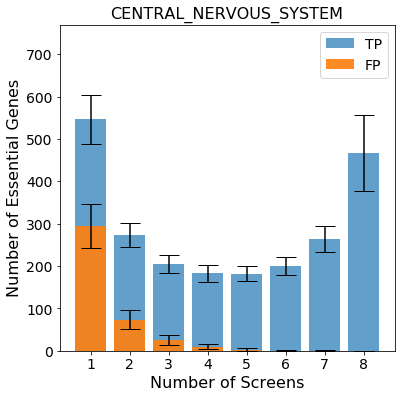

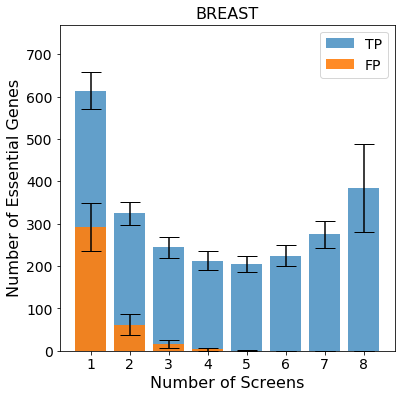

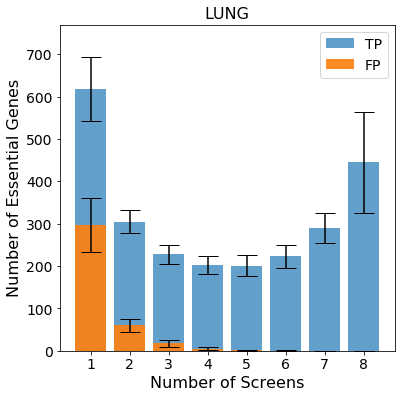

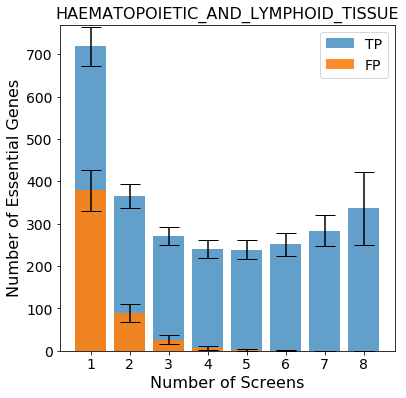

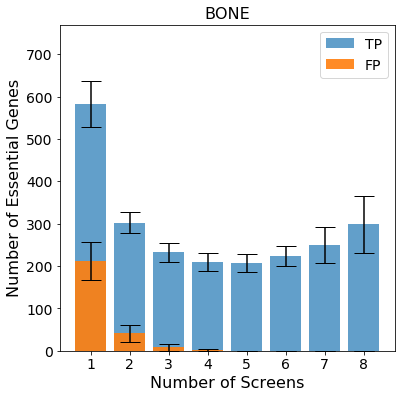

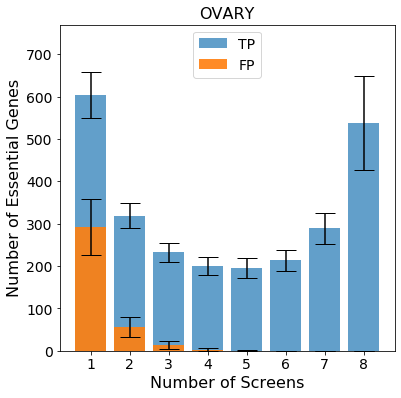

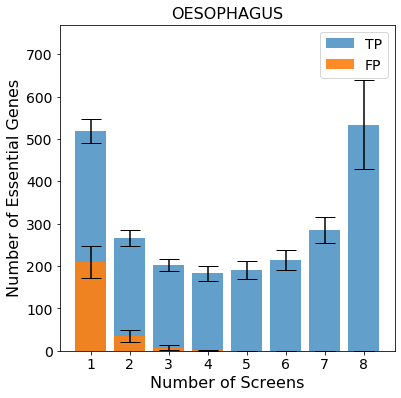

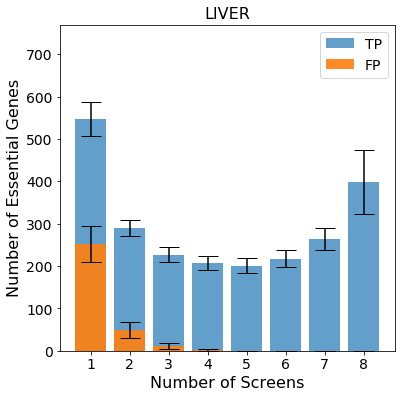

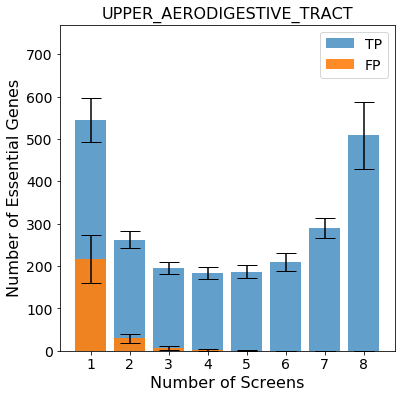

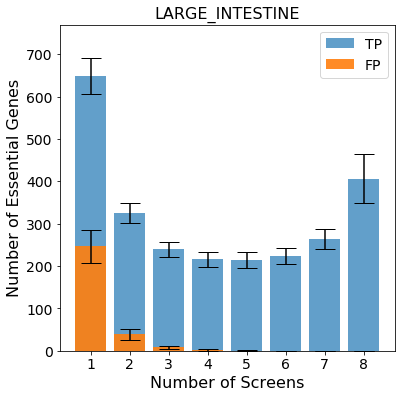

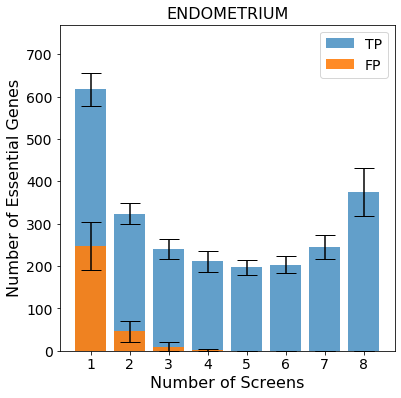

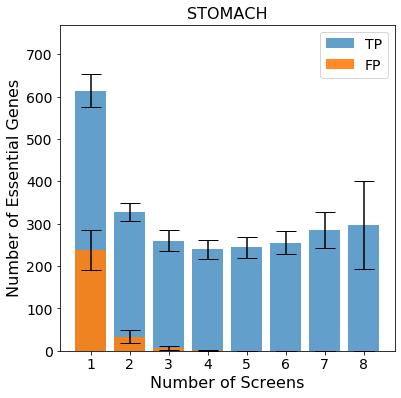

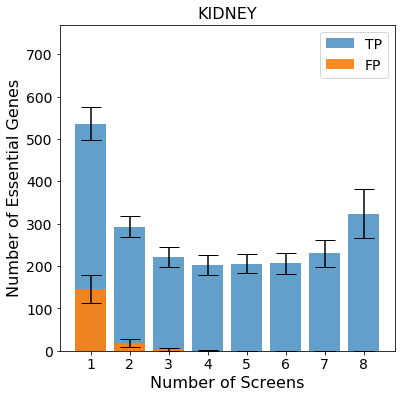

In [63]:
'''path = "./figs/"

os.mkdir(path)

path = "./figs/bar_TP_FP/"

os.mkdir(path)'''


figsize(6,6)
for i in tissue_names:
    plt.bar(np.arange(1,9),globals()['mean_df1_%s' % i].values(), yerr=globals()['std_df1_%s' % i].values(), align='center', alpha=0.7, ecolor='black', capsize=10,
           label='TP')


    plt.bar(np.arange(1,9),globals()['mean_df2_%s' % i].values(), yerr=globals()['std_df2_%s' % i].values(), align='center', alpha=0.9, ecolor='black', capsize=10,
           label='FP')
    title(str(i), size=16)
    xlabel('Number of Screens', size=16)
    ylabel('Number of Essential Genes', size=16)
    xticks(size=14)
    yticks(size=14)
    ylim(0,770)
    legend(fontsize=14)
    


    savefig('./figs/bar_TP_FP/' +str(i)+ '_Avana20Q2_not_multi_TP_FP_bar.png', format='png', dpi=350, bbox_inches='tight')
    savefig('./figs/bar_TP_FP/' +str(i)+ '_Avana20Q2_not_multi_TP_FP_bar.pdf', format='pdf', bbox_inches='tight')
    plt.show()

In [64]:
fdr_ratio_all=dict()
for i in tissue_names:
    fdr_ratio_all[i]=dict()
    for j in globals()['mean_df1_%s' % i].keys():
        fdr_ratio_all[i][j]=globals()['mean_df2_%s' % i][j]/globals()['mean_df1_%s' % i][j]
    

In [65]:
pd.DataFrame(fdr_ratio_all)

,BILIARY_TRACT,SOFT_TISSUE,URINARY_TRACT,PANCREAS,SKIN,CENTRAL_NERVOUS_SYSTEM,BREAST,LUNG,HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,BONE,OVARY,OESOPHAGUS,LIVER,UPPER_AERODIGESTIVE_TRACT,LARGE_INTESTINE,ENDOMETRIUM,STOMACH,KIDNEY
1,0.423964,0.544615,0.448428,0.359106,0.366367,0.539342,0.475603,0.479917,0.526969,0.365105,0.484353,0.404059,0.459130,0.396862,0.380480,0.400606,0.388204,0.272749
2,0.147259,0.239809,0.155125,0.117479,0.116102,0.270023,0.190176,0.197223,0.242510,0.135441,0.175519,0.130107,0.170153,0.111674,0.118984,0.142875,0.102320,0.063553
3,0.044198,0.094410,0.048101,0.041568,0.032358,0.122906,0.065979,0.077028,0.094848,0.036098,0.055806,0.035188,0.045921,0.038068,0.032723,0.039807,0.021997,0.014239
4,0.009124,0.032251,0.008380,0.015019,0.008444,0.054098,0.016549,0.025170,0.031073,0.006581,0.013479,0.006465,0.009946,0.008602,0.010178,0.005499,0.005305,0.001530
5,0.000772,0.007035,0.000870,0.004046,0.001593,0.016665,0.003132,0.005821,0.008698,0.000626,0.002979,0.000942,0.000945,0.001764,0.002477,0.000610,0.000656,0.000049
6,0.000045,0.001208,0.000132,0.000930,0.000276,0.002588,0.000356,0.000896,0.001992,0.000000,0.000141,0.000047,0.000092,0.000095,0.000536,0.000098,0.000196,0.000000
7,0.000000,0.000038,0.000000,0.000033,0.000080,0.000379,0.000000,0.000034,0.000317,0.000040,0.000035,0.000000,0.000000,0.000000,0.000076,0.000000,0.000070,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000021,0.000000,0.000000,0.000059,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [66]:
pd.DataFrame(fdr_ratio_all).to_csv("Avana20Q2_not_multi_FDR_ratio_binwise_TP_over_FP.txt", sep="\t")

In [70]:
mean_hits_bin_TP=dict()
mean_hits_bin_FP=dict()
std_hits_bin_TP=dict()
std_hits_bin_FP=dict()
for i in tissue_names:
    mean_hits_bin_TP[i]=globals()['mean_df1_%s' % i]
    mean_hits_bin_FP[i]=globals()['mean_df2_%s' % i]
    std_hits_bin_TP[i]=globals()['std_df1_%s' % i]
    std_hits_bin_FP[i]=globals()['std_df2_%s' % i]
    

In [71]:
pd.DataFrame(mean_hits_bin_TP)

,BILIARY_TRACT,SOFT_TISSUE,URINARY_TRACT,PANCREAS,SKIN,CENTRAL_NERVOUS_SYSTEM,BREAST,LUNG,HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,BONE,OVARY,OESOPHAGUS,LIVER,UPPER_AERODIGESTIVE_TRACT,LARGE_INTESTINE,ENDOMETRIUM,STOMACH,KIDNEY
1,569.01,678.13,556.21,586.93,599.89,546.74,614.02,619.19,718.79,583.12,603.94,518.34,547.84,544.37,648.47,617.34,614.11,536.50
2,298.59,330.68,273.65,303.80,302.75,272.94,324.70,304.63,366.17,302.05,319.11,265.55,290.21,262.46,324.75,323.85,327.99,293.30
3,223.54,253.15,209.56,224.45,225.60,204.71,244.17,228.23,270.96,232.42,232.59,202.34,226.26,195.70,239.59,240.41,260.04,221.22
4,204.96,225.42,196.90,194.42,204.89,183.00,212.70,201.83,240.72,209.69,201.05,182.51,208.13,183.67,216.15,210.93,239.39,202.59
5,207.14,214.64,206.78,190.33,207.18,181.82,204.33,200.98,239.13,207.67,194.68,191.15,200.99,187.08,214.01,196.83,243.93,206.00
6,223.67,223.51,226.84,215.04,217.21,200.90,224.43,223.21,251.01,223.52,213.42,214.56,217.49,209.95,224.02,203.61,255.39,206.71
7,284.54,262.47,280.48,298.73,250.62,263.59,274.60,290.10,283.49,249.50,288.85,286.16,263.83,290.43,263.70,245.24,285.42,229.78
8,479.79,342.15,401.97,503.57,366.38,467.06,383.88,445.05,336.46,298.63,538.08,533.79,398.88,508.51,405.74,374.64,296.48,323.68


In [72]:
pd.DataFrame(mean_hits_bin_TP).to_csv("Mean_hits_per_bin_all_Avana20Q2_not_multi_TP.txt", sep="\t")

In [73]:
pd.DataFrame(mean_hits_bin_FP)

,BILIARY_TRACT,SOFT_TISSUE,URINARY_TRACT,PANCREAS,SKIN,CENTRAL_NERVOUS_SYSTEM,BREAST,LUNG,HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,BONE,OVARY,OESOPHAGUS,LIVER,UPPER_AERODIGESTIVE_TRACT,LARGE_INTESTINE,ENDOMETRIUM,STOMACH,KIDNEY
1,241.24,369.32,249.42,210.77,219.78,294.88,292.03,297.16,378.78,212.90,292.52,209.44,251.53,216.04,246.73,247.31,238.40,146.33
2,43.97,79.30,42.45,35.69,35.15,73.70,61.75,60.08,88.80,40.91,56.01,34.55,49.38,29.31,38.64,46.27,33.56,18.64
3,9.88,23.90,10.08,9.33,7.30,25.16,16.11,17.58,25.70,8.39,12.98,7.12,10.39,7.45,7.84,9.57,5.72,3.15
4,1.87,7.27,1.65,2.92,1.73,9.90,3.52,5.08,7.48,1.38,2.71,1.18,2.07,1.58,2.20,1.16,1.27,0.31
5,0.16,1.51,0.18,0.77,0.33,3.03,0.64,1.17,2.08,0.13,0.58,0.18,0.19,0.33,0.53,0.12,0.16,0.01
6,0.01,0.27,0.03,0.20,0.06,0.52,0.08,0.20,0.50,0.00,0.03,0.01,0.02,0.02,0.12,0.02,0.05,0.00
7,0.00,0.01,0.00,0.01,0.02,0.10,0.00,0.01,0.09,0.01,0.01,0.00,0.00,0.00,0.02,0.00,0.02,0.00
8,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [74]:
pd.DataFrame(mean_hits_bin_FP).to_csv("Mean_hits_per_bin_all_Avana20Q2_not_multi_FP.txt", sep="\t")

In [75]:
pd.DataFrame(std_hits_bin_TP)

,BILIARY_TRACT,SOFT_TISSUE,URINARY_TRACT,PANCREAS,SKIN,CENTRAL_NERVOUS_SYSTEM,BREAST,LUNG,HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,BONE,OVARY,OESOPHAGUS,LIVER,UPPER_AERODIGESTIVE_TRACT,LARGE_INTESTINE,ENDOMETRIUM,STOMACH,KIDNEY
1,38.844808,51.599008,47.720418,54.986547,64.441171,57.413197,43.105222,75.589761,45.336073,54.986367,55.045770,28.792613,40.137572,52.172336,43.123608,39.264763,38.516137,38.544871
2,24.664248,22.166441,20.347176,29.846070,25.654021,27.964198,27.285435,27.253637,27.993886,24.627887,29.203188,18.511462,19.470410,19.312643,24.107660,24.404990,21.680646,25.719740
3,19.524871,18.394320,17.518429,25.251613,25.364017,20.383839,24.117161,22.273259,21.016069,22.935650,22.088022,14.647522,17.624375,14.392408,17.625793,23.349386,24.855510,22.764308
4,18.558627,18.862169,16.863385,23.511089,21.381525,19.920042,22.502750,21.043032,20.481615,20.416717,20.964797,16.689375,16.407472,14.681848,17.276933,23.961356,22.830909,23.074362
5,16.515080,20.179257,18.435572,28.942665,19.033930,17.916969,19.087282,25.456233,21.813560,21.392935,23.569746,20.603214,18.106584,15.159542,18.981381,17.804241,24.110124,22.434191
6,22.807519,22.562817,21.226399,29.694716,23.171427,21.181515,24.576105,27.457330,27.178978,23.590137,25.056373,24.222170,20.081397,20.519700,18.847597,20.802047,27.942182,24.777921
7,38.000112,30.687231,23.761645,46.302225,28.084210,30.279538,30.807647,35.847460,36.046966,42.839022,37.012249,30.652078,26.491872,23.984951,23.220289,28.616630,43.088160,31.881276
8,87.445833,85.096781,80.531499,116.503371,77.240119,89.790420,103.619670,118.791080,86.439962,67.315427,111.092798,104.880239,75.571263,79.843217,57.901801,56.029487,104.386856,57.444726


In [76]:
pd.DataFrame(std_hits_bin_TP).to_csv("STD_hits_per_bin_all_Avana20Q2_not_multi_TP.txt", sep="\t")

In [77]:
pd.DataFrame(std_hits_bin_FP)

,BILIARY_TRACT,SOFT_TISSUE,URINARY_TRACT,PANCREAS,SKIN,CENTRAL_NERVOUS_SYSTEM,BREAST,LUNG,HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,BONE,OVARY,OESOPHAGUS,LIVER,UPPER_AERODIGESTIVE_TRACT,LARGE_INTESTINE,ENDOMETRIUM,STOMACH,KIDNEY
1,49.343185,61.344676,61.846042,44.164032,52.482336,52.586491,57.527939,64.278234,48.808341,44.733442,66.630517,37.406940,42.663697,56.587096,38.800150,56.820414,47.480565,32.345063
2,18.045092,22.663324,18.230497,11.801982,15.511075,22.752289,25.605151,15.010892,21.634708,20.398601,23.320557,14.060026,18.123471,10.036997,13.696951,24.522451,14.816944,9.267648
3,6.168149,11.546568,7.386419,4.559494,4.630815,11.398848,9.614693,8.011583,10.543321,7.893092,9.335476,5.407216,7.140573,4.531316,4.563182,10.128722,4.442858,2.972517
4,1.977934,5.849726,2.392644,2.529343,1.937691,6.811310,3.514702,3.365541,4.643840,2.264259,3.029468,1.465978,2.353828,1.615456,1.734964,2.237062,1.462356,0.837203
5,0.526471,1.822946,0.500101,1.003579,0.603943,4.154722,1.068559,1.645655,1.894596,0.393251,1.026714,0.479478,0.464823,0.652191,0.797154,0.383498,0.394917,0.100000
6,0.100000,0.583528,0.171447,0.449467,0.238683,1.714348,0.272660,0.550482,0.846860,0.000000,0.171447,0.100000,0.140705,0.140705,0.326599,0.140705,0.219043,0.000000
7,0.000000,0.100000,0.000000,0.100000,0.140705,0.627646,0.000000,0.100000,0.287623,0.100000,0.100000,0.000000,0.000000,0.000000,0.140705,0.000000,0.140705,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.140705,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [78]:
pd.DataFrame(std_hits_bin_FP).to_csv("STD_hits_per_bin_all_Avana20Q2_not_multi_FP.txt", sep="\t")

## Add in the expression data

In [79]:
exp=pd.read_csv("../Expression_CCLE_data_with_CCLE_IDs_Avana20Q2.txt", sep="\t", index_col=0)

In [80]:
exp.shape, bf.shape

((19144, 1303), (18111, 659))

In [81]:
## 5 cell lines do not have expression values
exp.head()

,KARPAS384_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,RAMOS_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,LPS510_SOFT_TISSUE,WSUDLCL2_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,FARAGE_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,DM3_FIBROBLAST,OMM25_UVEA,YD15_SALIVARY_GLAND,VMCUB1_URINARY_TRACT,OCILY7_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,...,BEN_LUNG,NCIH1573_LUNG,OUMS23_LARGE_INTESTINE,EN_ENDOMETRIUM,NCIH2106_LUNG,NCCSTCK140_STOMACH,RERFLCAI_LUNG,PANC0213_PANCREAS,SNU1066_UPPER_AERODIGESTIVE_TRACT,TT_OESOPHAGUS
TSPAN6,0.000000,0.000000,4.934988,0.839960,1.744161,3.722466,5.121015,4.632268,4.251719,0.000000,...,0.910733,4.997744,5.382321,5.002252,4.316870,5.227279,4.447579,4.714795,5.976364,5.117695
TNMD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.150560,0.042644,0.028569,0.070389,0.028569,0.028569,0.124328,0.000000
DPM1,4.667324,6.198887,6.635464,5.376082,6.846744,6.029674,5.989139,6.704180,5.651052,6.916357,...,5.740118,5.898450,6.551670,6.523719,5.990955,6.764341,6.748864,6.745910,5.983450,5.789468
SCYL3,1.761285,2.032101,1.929791,2.687061,2.147307,2.192194,1.863938,2.792855,3.440952,2.722466,...,2.505891,3.814550,2.592158,2.613532,3.185867,3.537296,2.650765,2.776104,2.939227,3.255501
C1orf112,3.554589,3.755956,2.503349,4.440288,3.666757,2.533563,4.035624,4.079805,3.275007,4.120186,...,3.161888,3.446256,4.352617,3.243364,4.846493,4.491212,4.607626,3.621759,2.918386,3.179511


In [82]:
[x for x in bf.columns if x not in exp.columns]

['OVCAR5_OVARY', 'A673_BONE', 'JHC7_BONE', 'MUGCHOR1_BONE', 'UMCHOR1_BONE']

## filter genes that do not have the essentiality data

In [83]:
len([x for x in bf.index if x not in exp.index])

73

In [85]:
exp_filtered=exp.loc[[x for x in bf.index.values if x in exp.index]]


In [86]:
exp_filtered.shape

(18038, 1303)

In [87]:
len([x for x in exp.columns if x in bf.columns])

654

## Let's get the mean expression of the genes in each bin in the same cell lines they were found to be essential in for TPs

In [89]:
for i in tissue_names:
    globals()['iter_mean_expr_same_screens_%s' % i]=dict()
    globals()['iter_std_expr_same_screens_%s' % i]=dict()
    
    for j in range(100):
        globals()['cell_lines_used_%s' % i]=globals()['cell_lines_%s' % i][j][0]# find the corresponding cell lines chosen per iteration
        globals()['ess_genes_in_iteration_%s' % i]=globals()['essential_genes_1_%s' % i][j] #EGs per iteration per bin
        # get to the bin level,k,  and get the expression
        globals()['mean_exp_same_screens_%s' % i]=dict()
        globals()['std_exp_same_screens_%s' % i]=dict()
        for k in arange(1,9):
            globals()['b_%s' % i]=exp_filtered[[x for x in globals()['cell_lines_used_%s' % i] if x in exp_filtered.columns]].loc[ [x for x in globals()['ess_genes_in_iteration_%s' % i][k] if x in exp_filtered.index]] #from corres exp data find the exp info for the ess genes
            globals()['mean_exp_same_screens_%s' % i][k]=globals()['b_%s' % i].mean(axis=1).mean()
            globals()['std_exp_same_screens_%s' % i][k]=globals()['b_%s' % i].mean(axis=1).std()
            
        globals()['iter_mean_expr_same_screens_%s' % i][j]=globals()['mean_exp_same_screens_%s' % i]
        globals()['iter_std_expr_same_screens_%s' % i][j]=globals()['std_exp_same_screens_%s' % i]
    

In [90]:
for i in tissue_names:

    globals()['MEANS_%s' % i]=pd.DataFrame(globals()['iter_mean_expr_same_screens_%s' % i])
    globals()['MEANS_%s' % i]['mean']=globals()['MEANS_%s' % i].mean(axis=1)
    globals()['MEANS_%s' % i]['std']=globals()['MEANS_%s' % i].std(axis=1)

    globals()['STDs_%s' % i]=pd.DataFrame(globals()['iter_std_expr_same_screens_%s' % i])
    globals()['STDs_%s' % i]['mean']=globals()['STDs_%s' % i].mean(axis=1)
    globals()['STDs_%s' % i]['std']=globals()['STDs_%s' % i].std(axis=1)



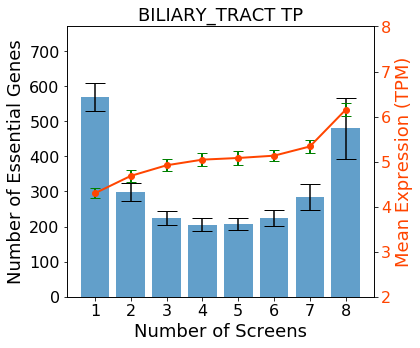

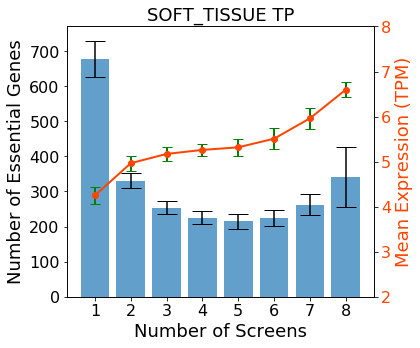

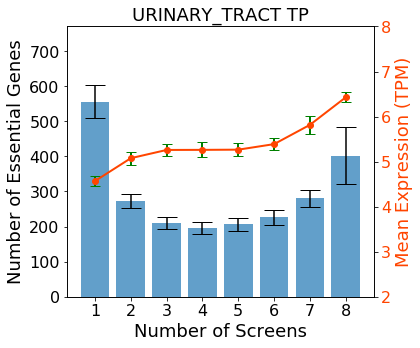

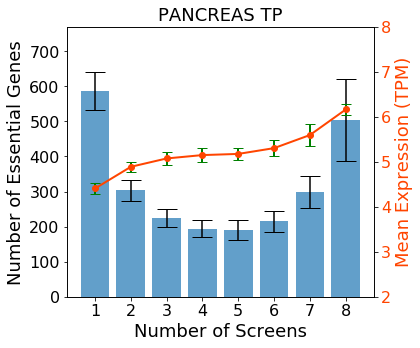

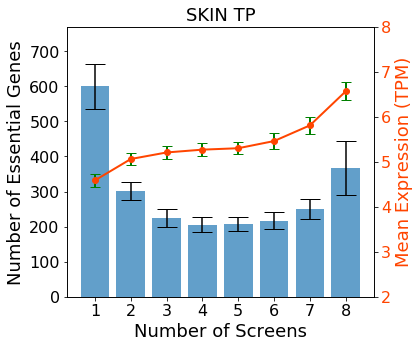

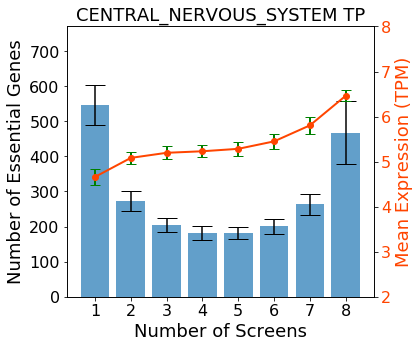

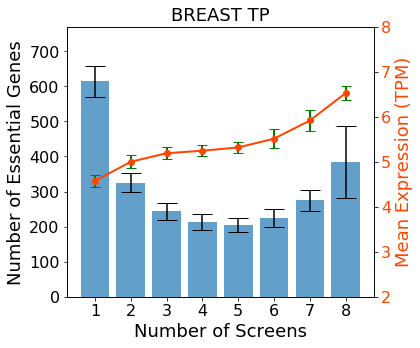

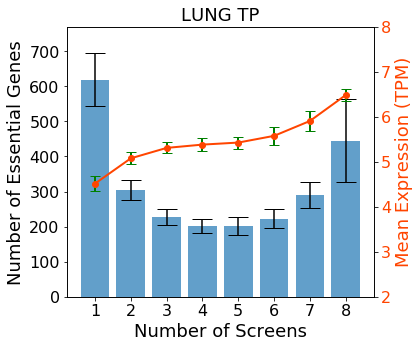

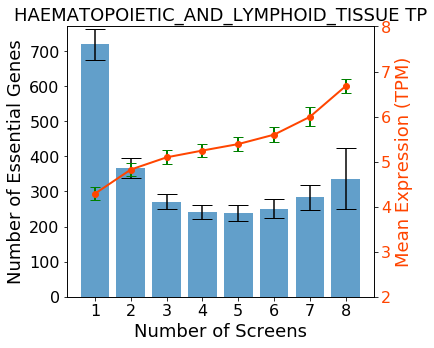

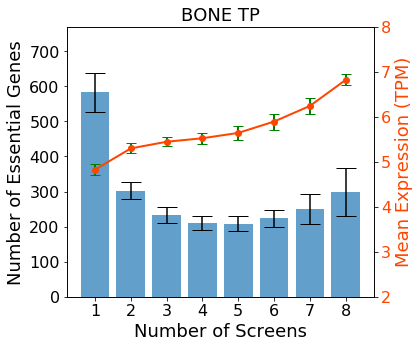

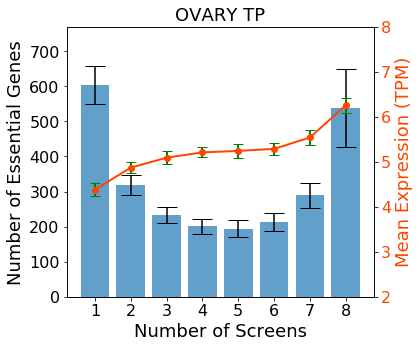

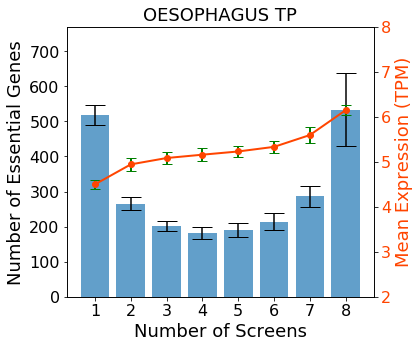

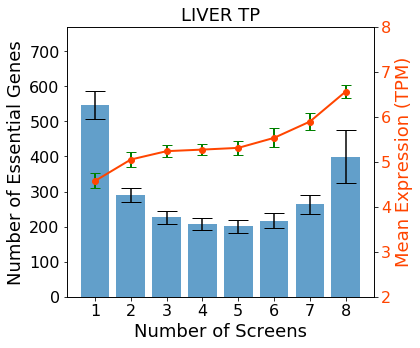

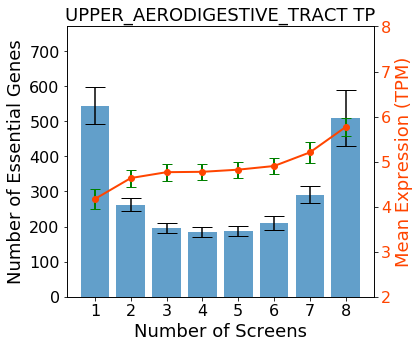

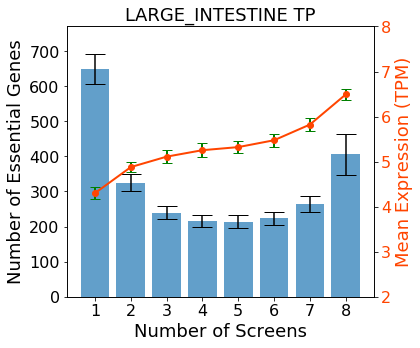

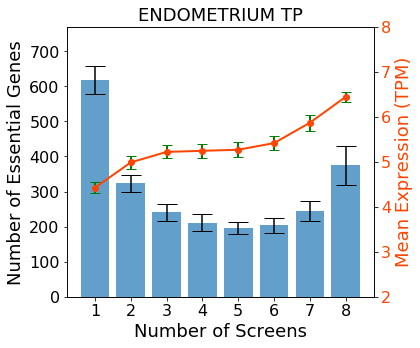

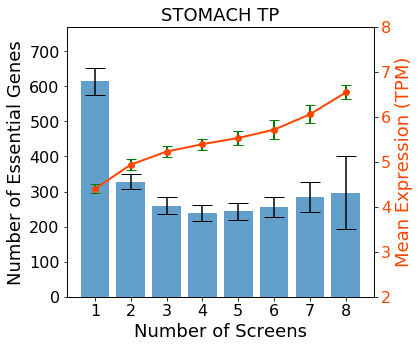

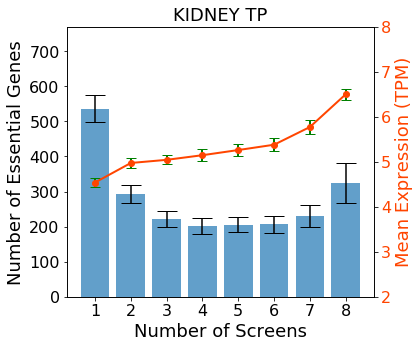

In [91]:
figsize(6,5)
x_axis = np.arange(1,9)

for i in tissue_names:
    globals()['data1_%s' % i]=globals()['mean_df1_%s' % i].values() # mean num of genes in bin
    globals()['data2_%s' % i]=globals()['MEANS_%s' % i]['mean'] #mean exp of genes in bin
    


    fig, ax1 = plt.subplots()

    color = 'black'
    ax1.set_xlabel('Number of Screens', size=18)
    ax1.set_ylabel('Number of Essential Genes', color=color, size=18)
    #ax1.plot(x_axis, data1, color=color)
    ax1.bar(x_axis, globals()['data1_%s' % i], yerr=globals()['std_df1_%s' % i].values(), align='center', alpha=0.7, ecolor='black', capsize=10)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_xticks([1,2,3,4,5,6,7,8])
    ax1.tick_params(axis='both', which='major', labelsize=16)
    ax1.set_ylim(0,770)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'orangered'
    ax2.set_ylabel('Mean Expression (TPM)', color=color, size=18)  # we already handled the x-label with ax1
    ax2.errorbar(x_axis, globals()['data2_%s' % i], yerr=globals()['MEANS_%s' % i]['std'], marker='o', lw=2, capsize=5, color='orangered',ecolor='green')
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_ylim(2,8)
    ax2.tick_params(axis='both', which='major', labelsize=16)
    

    title(str(i)+' TP', size=18)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    savefig('./figs/bar_TP_with_expression/' +str(i)+ '_Avana20Q2_not_multi_TP_bar_with_exp.png', format='png', dpi=350, bbox_inches='tight')
    savefig('./figs/bar_TP_with_expression/' +str(i)+ '_Avana20Q2_not_multi_TP_bar_with_exp.pdf', format='pdf', bbox_inches='tight')
    plt.show()
    

## Let's do the same for FPs

In [93]:
for i in tissue_names:
    globals()['iter_mean_expr_same_screens2_%s' % i]=dict()
    globals()['iter_std_expr_same_screens2_%s' % i]=dict()
    
    for j in range(100):
        globals()['cell_lines_used2_%s' % i]=globals()['cell_lines_%s' % i][j][1]# find the corresponding cell lines chosen per iteration
        globals()['ess_genes_in_iteration2_%s' % i]=globals()['essential_genes_2_%s' % i][j] #EGs per iteration per bin
        # get to the bin level,k,  and get the expression
        globals()['mean_exp_same_screens2_%s' % i]=dict()
        globals()['std_exp_same_screens2_%s' % i]=dict()
        for k in arange(1,9):
            globals()['b2_%s' % i]=exp_filtered[[x for x in globals()['cell_lines_used2_%s' % i] if x in exp_filtered.columns]].loc[ [x for x in globals()['ess_genes_in_iteration2_%s' % i][k] if x in exp_filtered.index]] #from corres exp data find the exp info for the FP genes
            globals()['mean_exp_same_screens2_%s' % i][k]=globals()['b2_%s' % i].mean(axis=1).mean()
            globals()['std_exp_same_screens2_%s' % i][k]=globals()['b2_%s' % i].mean(axis=1).std()
            
        globals()['iter_mean_expr_same_screens2_%s' % i][j]=globals()['mean_exp_same_screens2_%s' % i]
        globals()['iter_std_expr_same_screens2_%s' % i][j]=globals()['std_exp_same_screens2_%s' % i]
    

In [94]:
std_exp_same_screens2_OESOPHAGUS[5]

nan

In [95]:
for i in tissue_names:

    globals()['MEANS2_%s' % i]=pd.DataFrame(globals()['iter_mean_expr_same_screens2_%s' % i])
    globals()['MEANS2_%s' % i]['mean']=globals()['MEANS2_%s' % i].mean(axis=1)
    globals()['MEANS2_%s' % i]['std']=globals()['MEANS2_%s' % i].std(axis=1)

    globals()['STDs2_%s' % i]=pd.DataFrame(globals()['iter_std_expr_same_screens2_%s' % i])
    globals()['STDs2_%s' % i]['mean']=globals()['STDs2_%s' % i].mean(axis=1)
    globals()['STDs2_%s' % i]['std']=globals()['STDs2_%s' % i].std(axis=1)



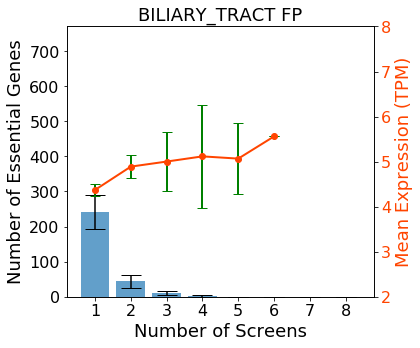

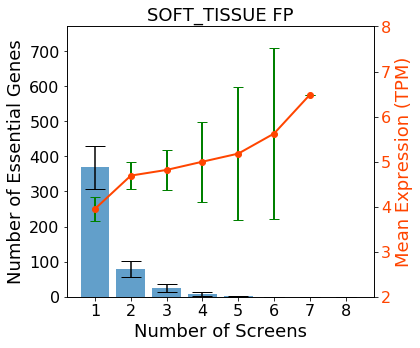

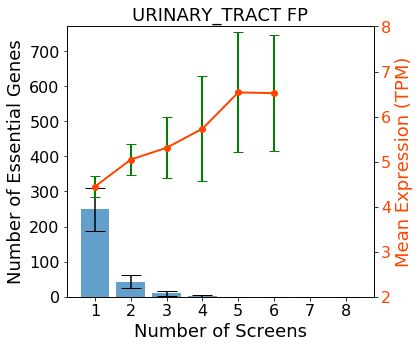

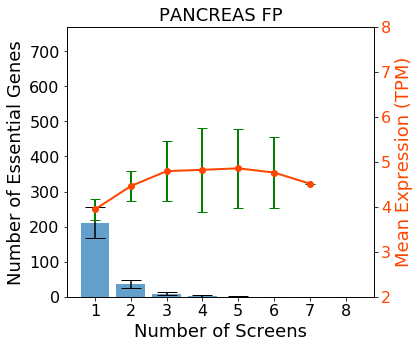

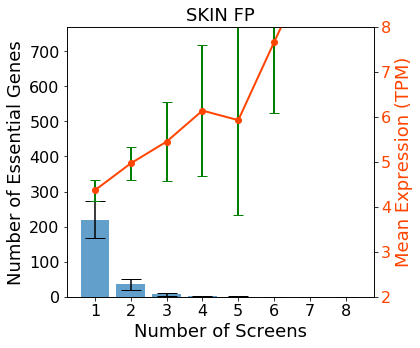

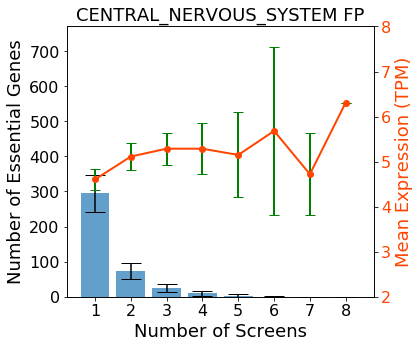

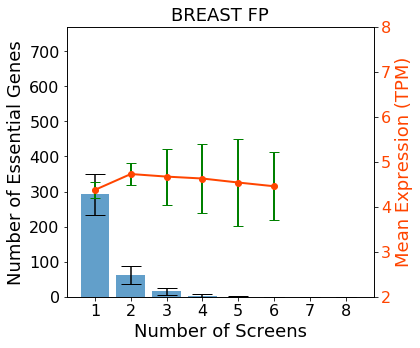

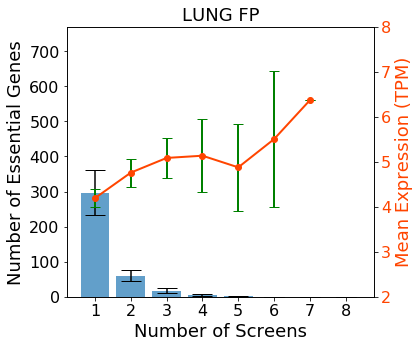

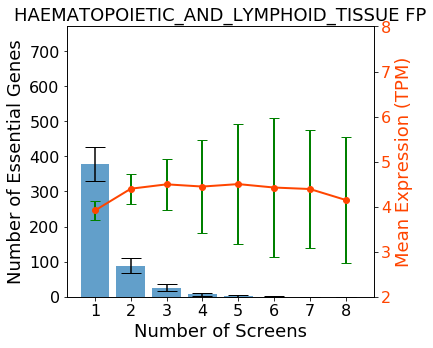

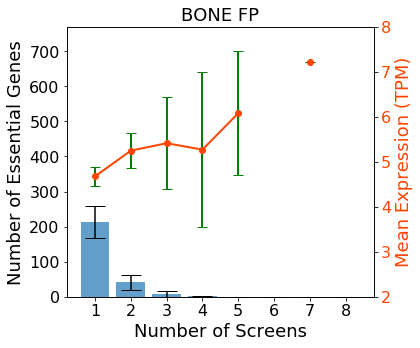

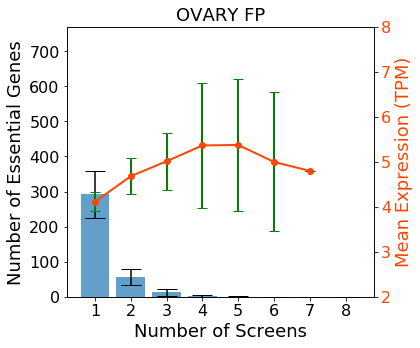

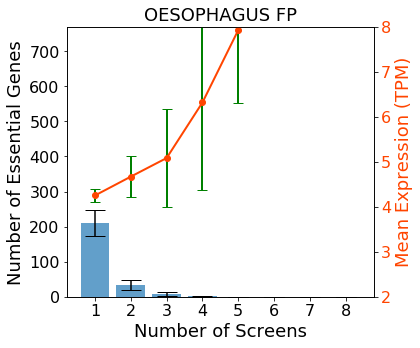

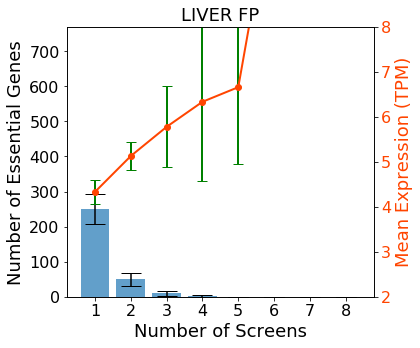

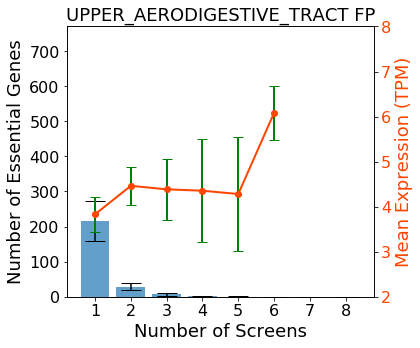

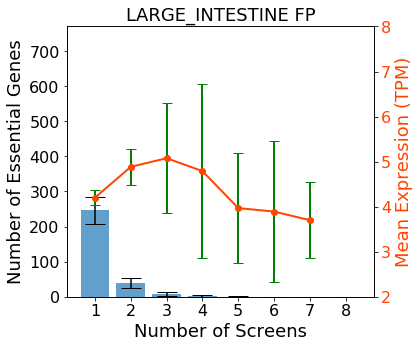

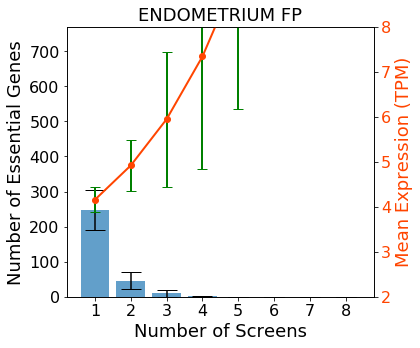

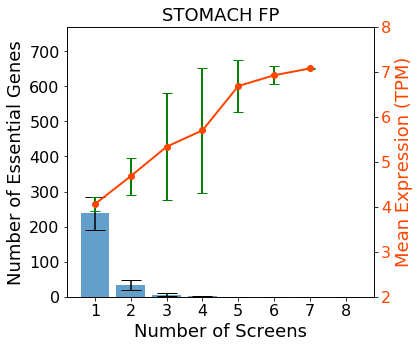

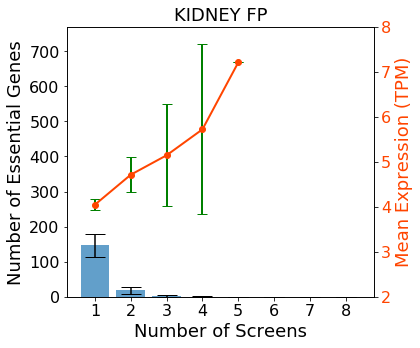

In [96]:
figsize(6,5)
x_axis = np.arange(1,9)

for i in tissue_names:
    globals()['data1FP_%s' % i]=globals()['mean_df2_%s' % i].values() # mean num of genes in bin
    globals()['data2FP_%s' % i]=globals()['MEANS2_%s' % i]['mean'] #mean exp of genes in bin
    


    fig, ax1 = plt.subplots()

    color = 'black'
    ax1.set_xlabel('Number of Screens', size=18)
    ax1.set_ylabel('Number of Essential Genes', color=color, size=18)
    #ax1.plot(x_axis, data1, color=color)
    ax1.bar(x_axis, globals()['data1FP_%s' % i], yerr=globals()['std_df2_%s' % i].values(), align='center', alpha=0.7, ecolor='black', capsize=10)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_xticks([1,2,3,4,5,6,7,8])
    ax1.tick_params(axis='both', which='major', labelsize=16)
    ax1.set_ylim(0,770)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'orangered'
    ax2.set_ylabel('Mean Expression (TPM)', color=color, size=18)  # we already handled the x-label with ax1
    ax2.errorbar(x_axis, globals()['data2FP_%s' % i], yerr=globals()['MEANS2_%s' % i]['std'], marker='o', lw=2, capsize=5, color='orangered',ecolor='green')
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_ylim(2,8)
    ax2.tick_params(axis='both', which='major', labelsize=16)
    

    title(str(i)+' FP', size=18)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    savefig('./figs/bar_FP_with_expression/' +str(i)+ '_Avana20Q2_not_multi_FP_bar_with_exp.png', format='png', dpi=350, bbox_inches='tight')
    savefig('./figs/bar_FP_with_expression/' +str(i)+ '_Avana20Q1_not_multi_FP_bar_with_exp.pdf', format='pdf', bbox_inches='tight')
    plt.show()
    

## Now let's see the essentiality profiles of genes in screens they are not essential in

In [97]:
for i in tissue_names:
    globals()['iter_mean_bf_other_screens_%s' % i]=dict() 
    globals()['iter_std_bf_other_screens_%s' % i]=dict()
    
    for j in range(100):
        globals()['cell_lines_used_%s' % i]=globals()['cell_lines_%s' % i][j][0]# find the corresponding cell lines chosen per iteration
        globals()['ess_genes_in_iteration_%s' % i]=globals()['essential_genes_1_%s' % i][j] #EGs per iteration per bin
 
        globals()['mean_bf_other_screens_%s' % i]=dict()
        globals()['std_bf_other_screens_%s' % i]=dict()
        
        # get to the bin level,k
        for k in arange(1,9):
            globals()['a_%s' % i]= globals()['%s_data' % i] [globals()['cell_lines_used_%s' % i]].loc[globals()['ess_genes_in_iteration_%s' % i] [k]] #from tissue data find the BF info for the ess genes
            globals()['mean_bf_other_screens_%s' % i][k]=globals()['a_%s' % i][globals()['a_%s' % i]<10].mean(axis=1).mean() # get the mean where gene has BF<10
            globals()['std_bf_other_screens_%s' % i][k]=globals()['a_%s' % i][globals()['a_%s' % i]<10].mean(axis=1).std()
            
        globals()['iter_mean_bf_other_screens_%s' % i][j]=globals()['mean_bf_other_screens_%s' % i]
        globals()['iter_std_bf_other_screens_%s' % i][j]=globals()['std_bf_other_screens_%s' % i]
    
    

In [98]:
for i in tissue_names:
    globals()['DF_iter_mean_bf_other_screens_%s' % i]=pd.DataFrame(globals()['iter_mean_bf_other_screens_%s' % i])
    
    

In [99]:
DF_iter_mean_bf_other_screens_BILIARY_TRACT

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1,-9.411390,-5.697167,-7.339962,-6.041959,-10.649275,-6.923493,-9.260581,-9.584449,-7.455022,-9.307029,...,-8.983678,-5.592477,-8.654812,-5.430921,-7.386366,-9.073380,-7.538149,-8.545455,-7.957934,-7.755320
2,-5.272954,-3.279536,-3.203593,-1.746530,-6.779720,-3.114001,-5.466058,-5.933497,-4.340207,-5.447251,...,-5.391255,-2.780246,-5.705029,-2.902411,-4.045781,-5.043139,-3.667587,-4.444372,-4.442623,-4.241998
3,-3.459971,-0.936315,-1.340442,-0.569511,-4.139526,-1.246956,-3.993095,-2.698074,-2.096843,-3.352616,...,-2.323938,-0.276997,-2.885990,-0.353720,-1.409976,-3.126535,-1.404182,-2.409028,-1.801800,-2.324254
4,-1.955031,0.988660,0.265872,0.809887,-2.795201,1.012442,-2.293133,-1.450055,-0.358122,-0.695125,...,-0.893705,1.315192,-1.290420,0.767433,0.232105,-1.177015,-0.002623,-0.535032,-1.199667,-0.431577
5,0.336712,2.181558,1.845516,1.601803,0.353592,1.820769,0.314170,0.233630,1.802802,0.440134,...,-0.045341,2.402544,0.097463,2.525728,1.119317,0.516955,2.350488,0.896109,0.573256,0.573897
6,2.161877,3.122246,2.208998,3.341427,0.781037,2.765172,1.018873,1.544484,2.982181,2.433860,...,2.006135,3.698648,2.091429,3.189619,2.929143,2.031243,3.962897,1.992940,2.162495,1.936202
7,1.964155,4.721365,4.389616,4.071492,1.627113,4.798600,2.649286,3.825682,4.829646,4.462457,...,3.712044,4.213333,2.809441,4.539852,4.021798,3.420297,5.221077,4.005199,3.800124,3.468762
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
import seaborn as sns

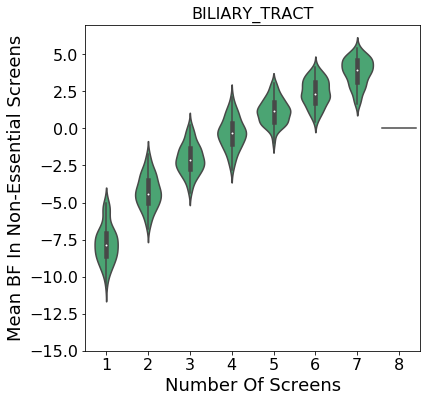

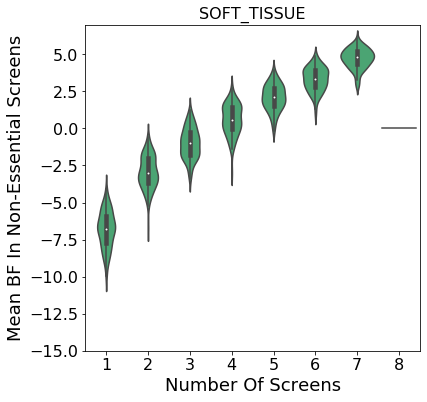

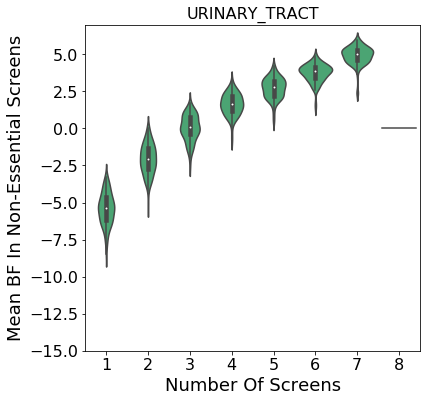

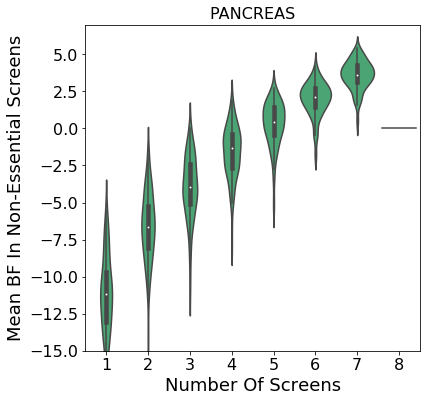

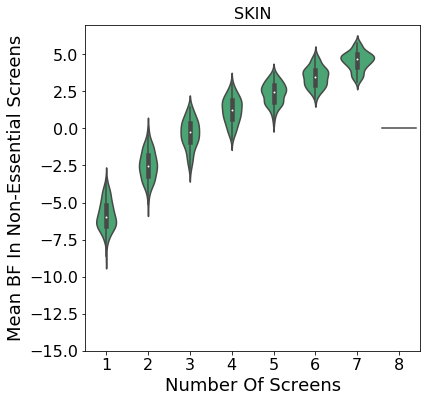

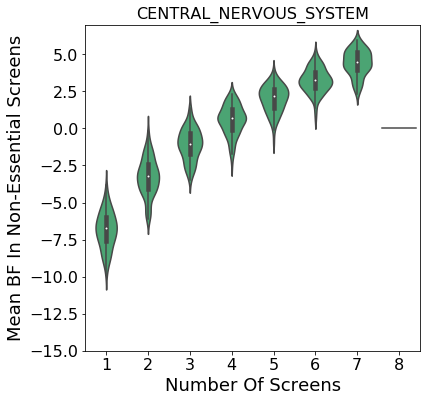

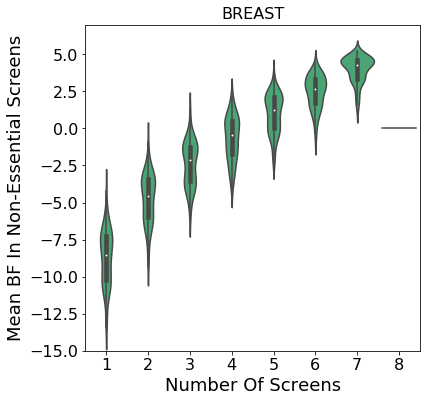

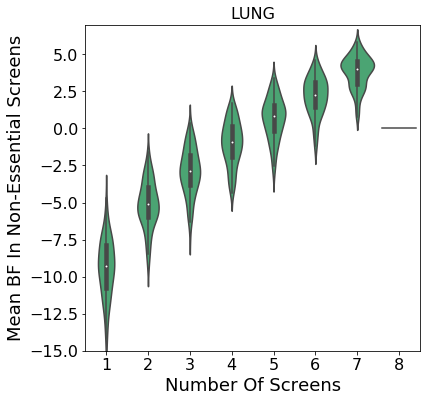

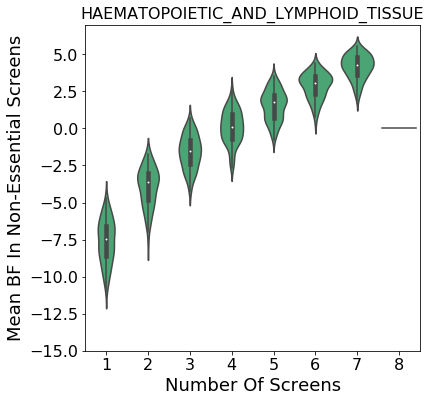

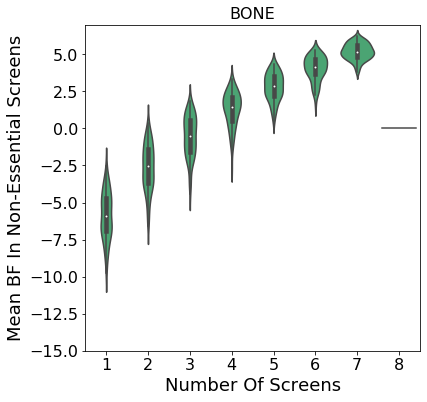

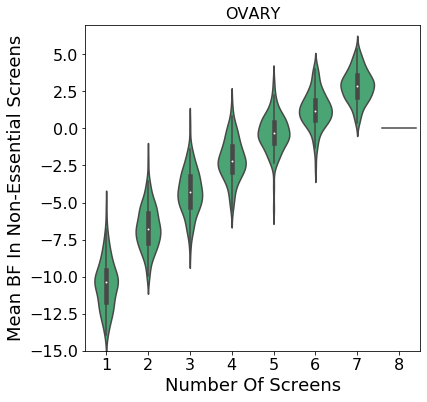

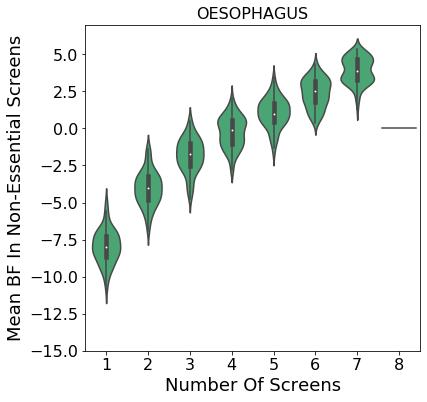

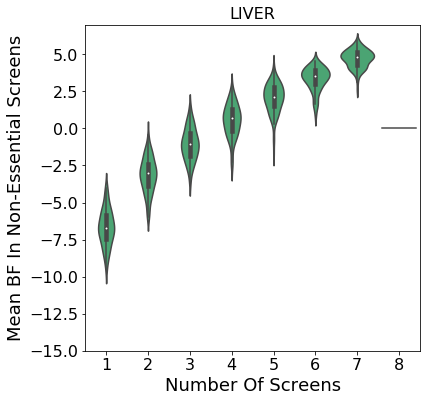

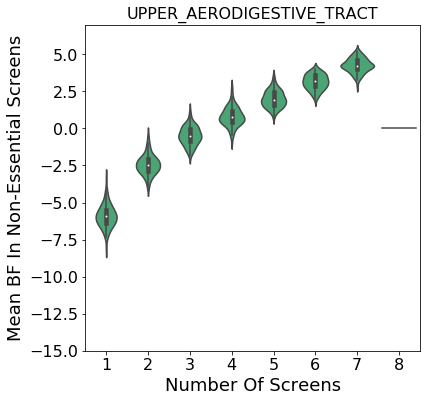

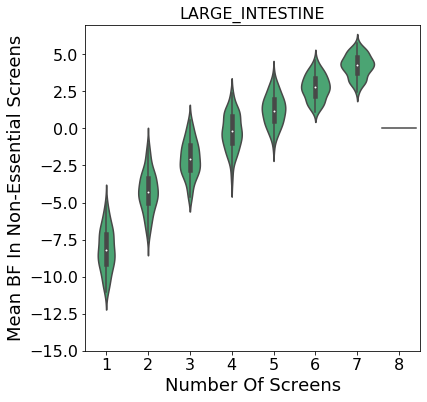

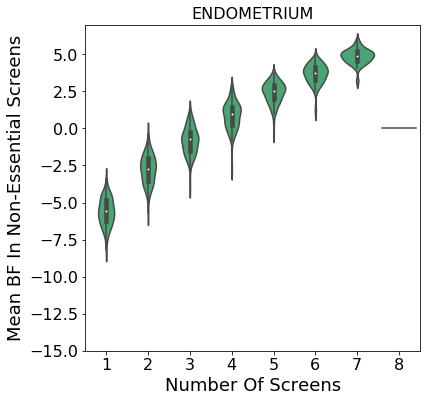

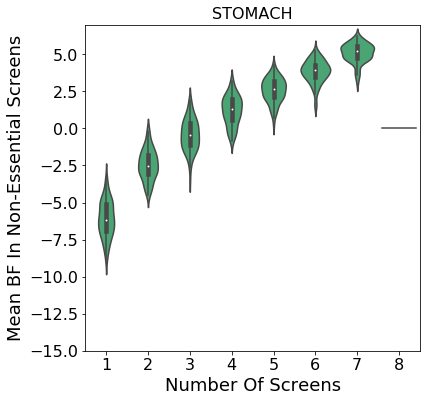

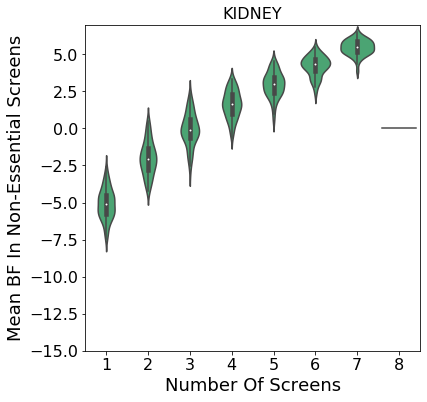

In [105]:
figsize(6,6)
for i in tissue_names:
    
    sns.violinplot(x='variable', y='value', data=globals()['DF_iter_mean_bf_other_screens_%s' % i].fillna(0).T.melt(), color='mediumseagreen')
    

    title(i, size=16)
    xlabel('Number Of Screens', size=18)
    ylabel('Mean BF In Non-Essential Screens', size=18)
    xticks(size=16)
    yticks(size=16)
    #ylim(-17,7)
    ylim(-15,7)
    #savefig('./figs/violin_BF_noness_screens/' + str(i) + '_Avana20Q2_not_multi_violin_BF_in_noness_screens_samerange.png', format='png', dpi=350, bbox_inches='tight')
    #savefig('./figs/violin_BF_noness_screens/' + str(i) + '_Avana20Q2_not_multi_violin_BF_in_noness_screens_samerange.pdf', format='pdf',  bbox_inches='tight')
    savefig('./figs/violin_BF_noness_screens/different_range/' + str(i) + '_Avana20Q2_not_multi_violin_BF_in_noness_screens.png', format='png', dpi=350, bbox_inches='tight')
    savefig('./figs/violin_BF_noness_screens/different_range/' + str(i) + '_Avana20Q2_not_multi_violin_BF_in_noness_screens.pdf', format='pdf',  bbox_inches='tight')
    
    plt.show()

